# Avocado project: In depth Analysis

## Import years 2016, 2017 and 2018 as DataFrames
Note: I added year 2015 to have more history and be able to predict seasonality more accurately

In [1]:
# Imports 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

The data is available as Excel files to download from http://www.hassavocadoboard.com/retail/volume-and-price-data

I had to open and save the files with Excel before reading them here.

In [2]:
# Read 2016, 2017, 2018 xls files into 2 dataframes (conventional and organic)
df_con = pd.DataFrame()
df_org = pd.DataFrame()

years = ['2015','2016','2017','2018']

for year in years:
    xls_con = pd.read_excel('HAB_Retail_Volume_and_Price_'+year+'_conventional_TotalUS.xls','Worksheet')
    df_con = df_con.append(xls_con)
    xls_org = pd.read_excel('HAB_Retail_Volume_and_Price_'+year+'_organic_TotalUS.xls','Worksheet')
    df_org = df_org.append(xls_org)


In [3]:
# Have a look at Conventional avocados
df_con.head()

Date  AveragePrice  Total Volume        4046         4225  \
0  2015-12-27          0.95   27297983.67  9626901.09  10197890.05   
1  2015-12-20          0.98   25083647.17  8710021.76   9329861.85   
2  2015-12-13          0.93   28041335.38  9855053.66  10805838.91   
3  2015-12-06          0.89   28800396.57  9405464.36  12160838.62   
4  2015-11-29          0.99   22617999.38  8094803.56   9003178.41   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags  
0  1184340.09  6288852.44  4850404.09  1252626.31    185822.04  
1  1201020.01  5842743.55  4618389.66  1025048.77    199305.12  
2  1016163.17  6364279.64  4964462.13  1371440.28     28377.23  
3   931830.63  6302262.96  5005077.36  1233956.21     63229.39  
4   731008.41  4789009.00  3901953.04   856560.34     30495.62

In [4]:
# Have a look at Organic avocados
df_org.head()

Date  AveragePrice  Total Volume      4046       4225      4770  \
0  2015-12-27          1.52     549787.59  89709.92  206198.62   5836.04   
1  2015-12-20          1.53     531478.24  93849.30  205909.13   8733.11   
2  2015-12-13          1.43     624300.31  91837.92  222314.60  11645.54   
3  2015-12-06          1.52     514112.96  90203.21  212582.74   4066.09   
4  2015-11-29          1.50     507830.81  79215.51  208733.32   3749.48   

   Total Bags  Small Bags  Large Bags  XLarge Bags  
0   248043.01   142262.93   105780.08          0.0  
1   222986.70   130418.73    92567.97          0.0  
2   298502.25   149767.80   148734.45          0.0  
3   207260.92   108684.49    98576.43          0.0  
4   216132.50    91658.24   124474.26          0.0

In [5]:
# Prepare for concat: set column names

df_con.columns = ['date','con_price','con_volume','con_4046','con_4225','con_4770','con_bags','con_s_bags','con_l_bags','con_xl_bags']
df_org.columns = ['date','org_price','org_volume','org_4046','org_4225','org_4770','org_bags','org_s_bags','org_l_bags','org_xl_bags']


In [6]:
# Prepare for concat: set datetime index

df_con.date = pd.to_datetime(df_con.date, errors='coerce')
df_con.set_index('date',inplace=True)
df_con.sort_index(inplace=True)

df_org.date = pd.to_datetime(df_org.date, errors='coerce')
df_org.set_index('date',inplace=True)
df_org.sort_index(inplace=True)


In [7]:
# concat conventional and organic

df = pd.concat([df_con,df_org],axis='columns')

## Get statistics info

In [8]:
df.head()

con_price   con_volume     con_4046     con_4225    con_4770  \
date                                                                       
2015-01-04       0.95  31324277.73  12357161.34  13624083.05   844093.32   
2015-01-11       1.01  29063542.75  11544810.53  12134773.38   866574.66   
2015-01-18       1.03  29043458.85  11858139.34  11701947.80   831301.90   
2015-01-25       1.04  28470310.84  12167445.03  10734652.82   768020.05   
2015-02-01       0.89  44655461.51  18933038.04  18956479.74  1381516.11   

              con_bags  con_s_bags  con_l_bags  con_xl_bags  org_price  \
date                                                                     
2015-01-04  4498940.02  3585321.58   894945.63     18672.81       1.46   
2015-01-11  4517384.18  3783261.16   718333.87     15789.15       1.42   
2015-01-18  4652069.81  3873041.26   771093.20      7935.35       1.42   
2015-01-25  4800192.94  3978636.90   812924.73      8631.31       1.53   
2015-02-01  5384427.62  4216452.03  1121076.47     46899.12       1.36   

            org_volume   org_4046   org_4225  org_4770   org_bags  org_s_bags  \
date                                                                            
2015-01-04   612910.15  233286.13  216611.20   4370.99  158641.83   115068.71   
2015-01-11   669528.88  270966.74  260971.60   3830.42  133760.12   106844.49   
2015-01-18   713120.00  254319.58  311811.01   4020.85  142968.56   101850.23   
2015-01-25   556368.86  207494.87  212312.02   4753.87  131808.10    95964.83   
2015-02-01   740896.97  302561.47  259286.44   5852.28  173196.78   129953.15   

            org_l_bags  org_xl_bags  
date                                 
2015-01-04    43573.12          0.0  
2015-01-11    26915.63          0.0  
2015-01-18    41118.33          0.0  
2015-01-25    35843.27          0.0  
2015-02-01    43243.63          0.0

In [9]:
df.tail()

con_price   con_volume     con_4046     con_4225   con_4770  \
date                                                                      
2018-11-04       1.01  38363282.73  12420772.32  10192035.49  528277.90   
2018-11-11       1.00  39042283.34  13355863.68  10385141.10  603032.80   
2018-11-18       1.14  29871135.02   9719228.92   7271528.37  497404.35   
2018-11-25       1.25  21855493.69   7140335.30   6021450.19  402865.82   
2018-12-02       1.22  27652425.62   9516477.21   7462865.75  521910.02   

               con_bags   con_s_bags  con_l_bags  con_xl_bags  org_price  \
date                                                                       
2018-11-04  15222197.02  10602848.85  4538743.36     80604.81       1.50   
2018-11-11  14698245.76  10721367.16  3865596.48    111282.12       1.49   
2018-11-18  12382973.38   9174635.04  3103022.56    105315.78       1.54   
2018-11-25   8290842.38   6016142.82  2183010.88     91688.68       1.66   
2018-12-02  10151172.64   7174281.40  2895343.32     81547.92       1.58   

            org_volume   org_4046   org_4225  org_4770    org_bags  \
date                                                                 
2018-11-04  1436243.31  133539.46  257419.27    539.39  1044632.76   
2018-11-11  1534804.73  147086.46  251477.54    559.52  1135599.27   
2018-11-18  1652276.32  212734.08  323987.85    625.41  1114928.98   
2018-11-25  1160387.64  140817.14  232897.58    449.83   786164.96   
2018-12-02  1242754.19  118442.29  230167.57    748.83   893381.79   

            org_s_bags  org_l_bags  org_xl_bags  
date                                             
2018-11-04   877016.53   167588.52        27.71  
2018-11-11   986753.99   148800.45        44.83  
2018-11-18   957528.55   157392.69         7.74  
2018-11-25   612004.35   174132.66        27.95  
2018-12-02   698557.18   194824.61         0.00

In [10]:
df.describe()

con_price    con_volume      con_4046      con_4225      con_4770  \
count  201.000000  2.010000e+02  2.010000e+02  2.010000e+02  2.010000e+02   
mean     1.091841  3.483720e+07  1.218414e+07  1.160926e+07  8.929575e+05   
std      0.163506  6.799473e+06  2.520194e+06  2.372377e+06  4.057676e+05   
min      0.760000  2.100973e+07  7.020459e+06  6.021450e+06  3.444759e+05   
25%      0.990000  3.009470e+07  1.059690e+07  1.021323e+07  5.990075e+05   
50%      1.050000  3.412673e+07  1.214227e+07  1.139814e+07  7.951732e+05   
75%      1.180000  3.824767e+07  1.348885e+07  1.298122e+07  1.085082e+06   
max      1.650000  6.371614e+07  2.274362e+07  2.047057e+07  2.546439e+06   

           con_bags    con_s_bags    con_l_bags    con_xl_bags   org_price  \
count  2.010000e+02  2.010000e+02  2.010000e+02     201.000000  201.000000   
mean   1.015084e+07  7.621240e+06  2.383997e+06  145602.783333    1.548657   
std    3.755146e+06  2.565964e+06  1.196412e+06  111657.486260    0.188628   
min    4.417407e+06  3.476493e+06  6.103492e+05    7461.200000    1.000000   
25%    6.604080e+06  5.387869e+06  1.283547e+06   54490.730000    1.440000   
50%    1.020783e+07  7.649502e+06  2.358444e+06  107438.890000    1.530000   
75%    1.276474e+07  9.462413e+06  3.143280e+06  234089.680000    1.660000   
max    2.162537e+07  1.543625e+07  5.840415e+06  551693.650000    2.090000   

         org_volume       org_4046       org_4225      org_4770      org_bags  \
count  2.010000e+02     201.000000     201.000000    201.000000  2.010000e+02   
mean   1.067132e+06  148876.479154  307908.673731   4771.429502  6.008524e+05   
std    3.685648e+05   49790.320759   73605.959090   3885.701329  3.403035e+05   
min    5.018149e+05   77759.930000  198874.090000    449.830000  1.198562e+05   
25%    7.587951e+05  113379.250000  251786.630000   1745.310000  2.539479e+05   
50%    1.043429e+06  136748.960000  292584.440000   4322.990000  5.652142e+05   
75%    1.352960e+06  170184.000000  347488.780000   6213.470000  8.675087e+05   
max    2.114577e+06  361996.840000  680037.450000  26765.780000  1.373724e+06   

         org_s_bags     org_l_bags  org_xl_bags  
count  2.010000e+02     201.000000   201.000000  
mean   4.433058e+05  157511.184279    35.394030  
std    2.898819e+05   89244.258316    86.410668  
min    7.180700e+04   22985.220000     0.000000  
25%    1.507197e+05   85378.960000     0.000000  
50%    3.708152e+05  149624.530000     0.000000  
75%    6.585365e+05  212101.670000    24.600000  
max    1.054811e+06  561530.390000   613.750000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2015-01-04 to 2018-12-02
Data columns (total 18 columns):
con_price      201 non-null float64
con_volume     201 non-null float64
con_4046       201 non-null float64
con_4225       201 non-null float64
con_4770       201 non-null float64
con_bags       201 non-null float64
con_s_bags     201 non-null float64
con_l_bags     201 non-null float64
con_xl_bags    201 non-null float64
org_price      201 non-null float64
org_volume     201 non-null float64
org_4046       201 non-null float64
org_4225       201 non-null float64
org_4770       201 non-null float64
org_bags       201 non-null float64
org_s_bags     201 non-null float64
org_l_bags     201 non-null float64
org_xl_bags    201 non-null float64
dtypes: float64(18)
memory usage: 29.8 KB


#### The data spans from 01/04/2015 to 12/02/2018.

There are 201 rows, no null values.

There are 18 columns, all of float64 type.

type 4046 identify small/medium Hass avocado, type 4225 identify large Hass avocado, type 4770 identify extra large avocado. You can see this product lookup code (PLU) on the avocado sticker.

## Plot

The max for conventional avocado volume is 30 times the one for organic avocado, so I will have to plot them separately.

<Figure size 432x288 with 0 Axes>

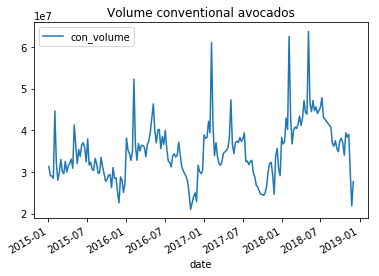

In [12]:
plt.clf()
df.plot(y='con_volume', title='Volume conventional avocados')
plt.show()

I can see some peaks in the plot. Are these outliers?

I don’t think so because:
- These peaks appear each year at the same period
- These peaks appear on the plots for each type of avocado

<Figure size 432x288 with 0 Axes>

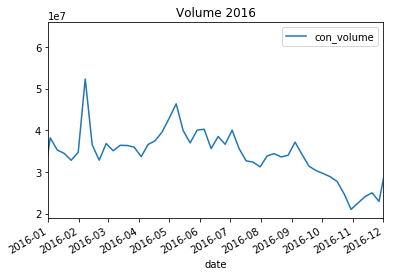

In [13]:
plt.clf()
df.plot(xlim=('2016-01','2016-12'), y='con_volume', title = 'Volume 2016')
plt.show()

<Figure size 432x288 with 0 Axes>

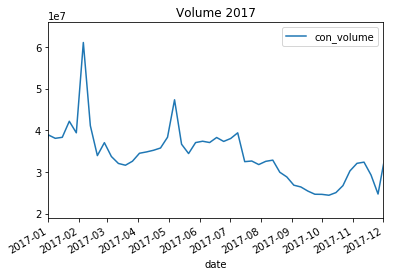

In [14]:
plt.clf()
df.plot(xlim=('2017-01','2017-12'), y='con_volume', title = 'Volume 2017')
plt.show()

<Figure size 432x288 with 0 Axes>

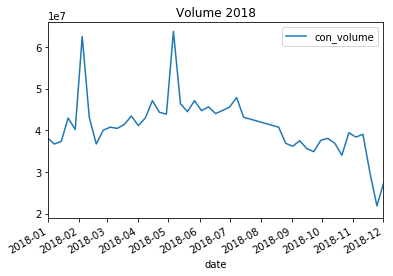

In [15]:
plt.clf()
df.plot(xlim=('2018-01','2018-12'), y='con_volume', title = 'Volume 2018')
plt.show()

There is a pattern that reproduces every year, with peaks at the beginning of February, and beginning of May.

Are these peaks related to holidays?

Maybe, beginning of February is Super Bowl, beginning of May is Cinco de Mayo. However, some holidays don’t seem to have the same impact on avocado sales: Halloween, Thanksgiving.

My first idea was to flag the dates as holiday/not holiday, but after this preview of the data, I will mark the dates with specific holidays.

<Figure size 432x288 with 0 Axes>

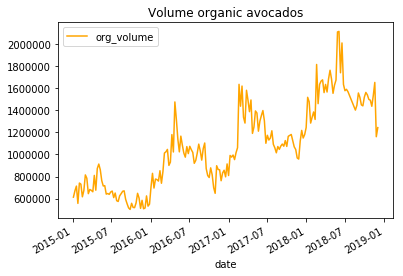

In [16]:
plt.clf()
df.plot(y='org_volume', title='Volume organic avocados', color='orange')
plt.show()

The organic avocados follow the same pattern as conventional avocados, but the peaks are smoother.

The price is USD 0.76 to USD 2.09 so I can plot the unit price for conventional and organic avocados together.

<Figure size 432x288 with 0 Axes>

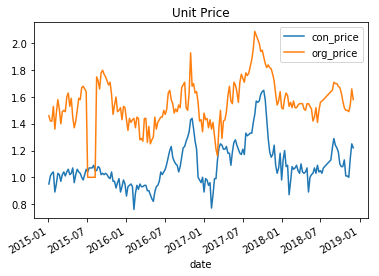

In [17]:
plt.clf()
df.plot(y=['con_price','org_price'], title = 'Unit Price')
plt.show()

It seems there is a negative correlation between price and volume: high volume corresponding to low price.
It could be interesting to plot the revenue, to see if it’s stable.

In [18]:
plot_df = pd.DataFrame()
plot_df['con_revenue'] = df['con_price']*df['con_volume']
plot_df['org_revenue'] = df['org_price']*df['org_volume']

<Figure size 432x288 with 0 Axes>

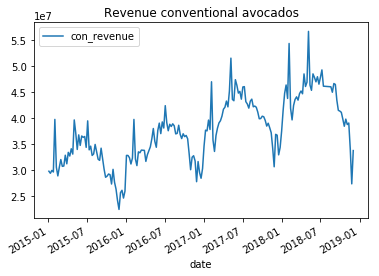

In [19]:
plt.clf()
plot_df.plot(y='con_revenue', title='Revenue conventional avocados')
plt.show()

This plot reflects the same highs and lows as the volume plot.

## Merge holidays

I define the holidays as lists for each year. I will use the most important U.S holidays and add the Super Bowl and Cinco de Mayo.

Note: For the previous versions, I though the peaks at the beginning of February was due to Mexico Constitution Day, but a friend told me that the Super Bowl is at the beginning of February. So I changed my mind and added 'super bowl' to the holidays.

In [20]:
# Define holidays

holidays = ['new_year','mlk_day','super bowl','valentine','president','st_patrick','easter','cinco_mayo',
           'memorial','independence','labor','columbus','halloween','veterans','thanksgiving','christmas']
dates2015 = ['2015-01-01','2015-01-19','2015-02-01','2015-02-14','2015-02-16','2015-03-17','2015-04-05','2015-05-05',
             '2015-05-25','2015-07-04','2015-09-07','2015-10-12','2015-10-31','2015-11-11','2015-11-26','2015-12-25']
dates2016 = ['2016-01-01','2016-01-18','2016-02-07','2016-02-14','2016-02-15','2016-03-17','2016-03-27','2016-05-05',
             '2016-05-30','2016-07-04','2016-09-05','2016-10-10','2016-10-31','2016-11-11','2016-11-24','2016-12-25']
dates2017 = ['2017-01-01','2017-01-16','2017-02-05','2017-02-14','2017-02-20','2017-03-17','2017-04-16','2017-05-05',
             '2017-05-29','2017-07-04','2017-09-04','2017-10-09','2017-10-31','2017-11-11','2017-11-23','2017-12-25']
dates2018 = ['2018-01-01','2018-01-15','2018-02-04','2018-02-14','2018-02-19','2018-03-17','2018-04-01','2018-05-05',
             '2018-05-28','2018-07-04','2018-09-03','2018-10-08','2018-10-31','2018-11-11','2018-11-22','2018-12-25']

In [21]:
# Create Dataframe for holidays

hdf = pd.DataFrame({'holiday': holidays, 'date': dates2015})
hdf = hdf.append(pd.DataFrame({'holiday': holidays, 'date': dates2016}))
hdf = hdf.append(pd.DataFrame({'holiday': holidays, 'date': dates2017}))
hdf = hdf.append(pd.DataFrame({'holiday': holidays, 'date': dates2018}))

In [22]:
# Set datetime index

hdf.date = pd.to_datetime(hdf.date, errors='coerce')
hdf.set_index('date',inplace=True)
hdf.sort_index(inplace=True)

In [23]:
# Reindex the holidays with the avocado data index
# I hesitated with backward fill (because you shop before the holiday), 
# but the sales are reported at the end of the week, 
# so I think nearest method is more accurate.

hdf = hdf.reindex(df.index,method='nearest',limit=1, fill_value='')

In [24]:
# Concat avocado data with the holidays

df = pd.concat([df,hdf],axis='columns')
df.head()

con_price   con_volume     con_4046     con_4225    con_4770  \
date                                                                       
2015-01-04       0.95  31324277.73  12357161.34  13624083.05   844093.32   
2015-01-11       1.01  29063542.75  11544810.53  12134773.38   866574.66   
2015-01-18       1.03  29043458.85  11858139.34  11701947.80   831301.90   
2015-01-25       1.04  28470310.84  12167445.03  10734652.82   768020.05   
2015-02-01       0.89  44655461.51  18933038.04  18956479.74  1381516.11   

              con_bags  con_s_bags  con_l_bags  con_xl_bags  org_price  \
date                                                                     
2015-01-04  4498940.02  3585321.58   894945.63     18672.81       1.46   
2015-01-11  4517384.18  3783261.16   718333.87     15789.15       1.42   
2015-01-18  4652069.81  3873041.26   771093.20      7935.35       1.42   
2015-01-25  4800192.94  3978636.90   812924.73      8631.31       1.53   
2015-02-01  5384427.62  4216452.03  1121076.47     46899.12       1.36   

            org_volume   org_4046   org_4225  org_4770   org_bags  org_s_bags  \
date                                                                            
2015-01-04   612910.15  233286.13  216611.20   4370.99  158641.83   115068.71   
2015-01-11   669528.88  270966.74  260971.60   3830.42  133760.12   106844.49   
2015-01-18   713120.00  254319.58  311811.01   4020.85  142968.56   101850.23   
2015-01-25   556368.86  207494.87  212312.02   4753.87  131808.10    95964.83   
2015-02-01   740896.97  302561.47  259286.44   5852.28  173196.78   129953.15   

            org_l_bags  org_xl_bags     holiday  
date                                             
2015-01-04    43573.12          0.0    new_year  
2015-01-11    26915.63          0.0              
2015-01-18    41118.33          0.0     mlk_day  
2015-01-25    35843.27          0.0     mlk_day  
2015-02-01    43243.63          0.0  super bowl

# Avocado project: Data Exploration

## Plot the volume evolution for all avocados over time and add a red dot for the holidays

In [25]:
plt.style.use('classic')

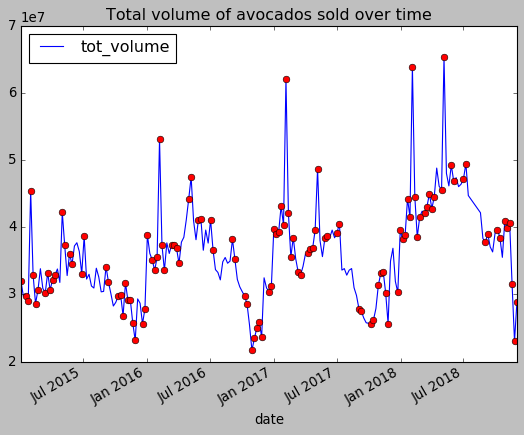

In [26]:
# Calculate total volume
df['tot_volume'] = df['con_volume'] + df['org_volume']

# plot the total volume of avocados as line plot
df.plot(y=['tot_volume'])

# plot the holidays as red dots
h_df = df[df['holiday']!='']
plt.plot(h_df['tot_volume'],'ro')

plt.title('Total volume of avocados sold over time')
plt.show()


The peaks I see correspond to holidays, so they have an impact on the data. But some holidays seem to have no impact. Let's try to focus on the holidays that have an impact.

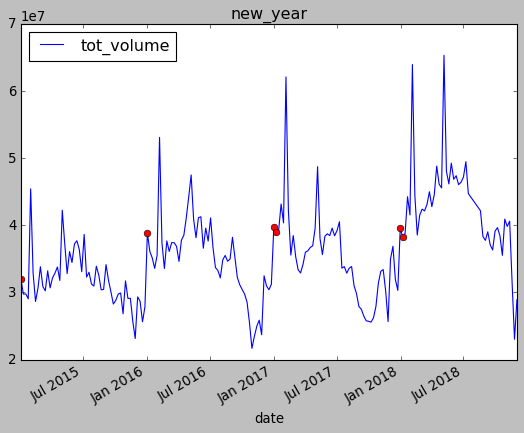

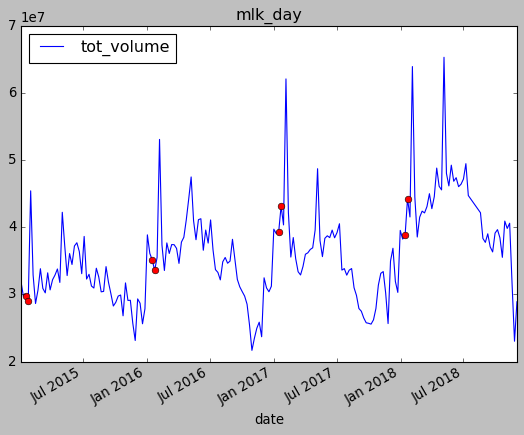

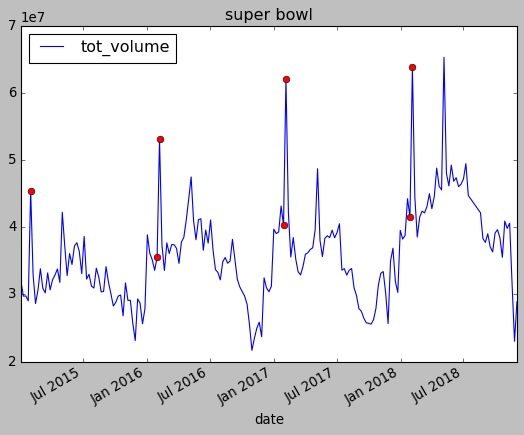

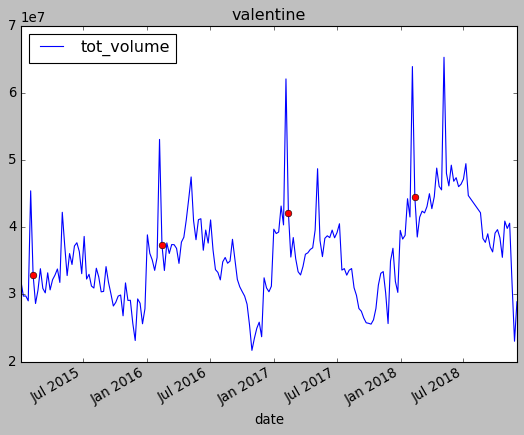

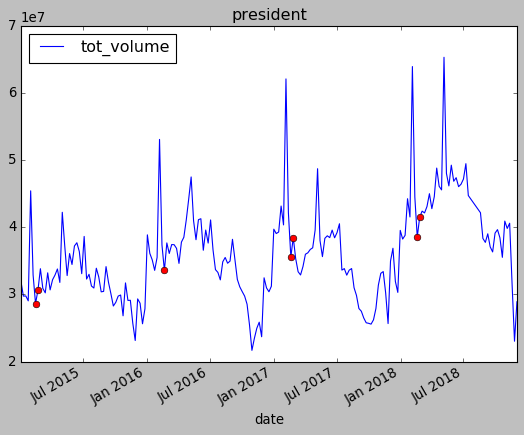

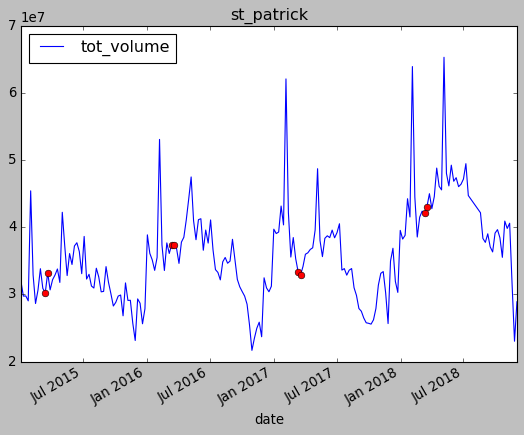

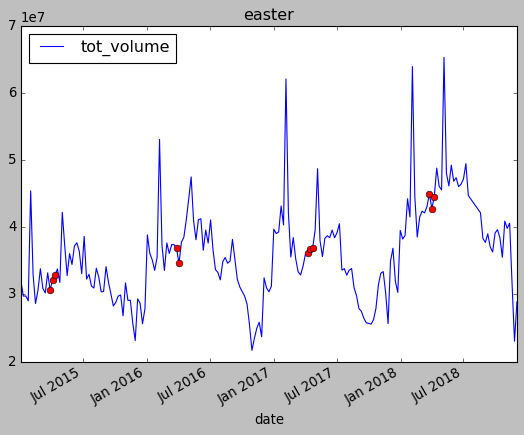

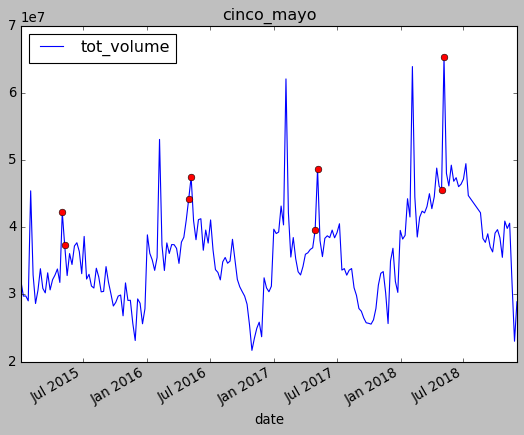

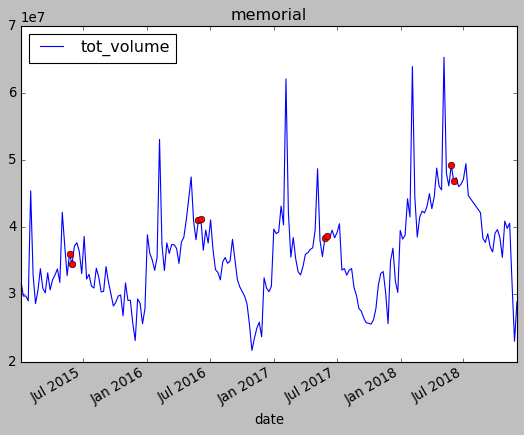

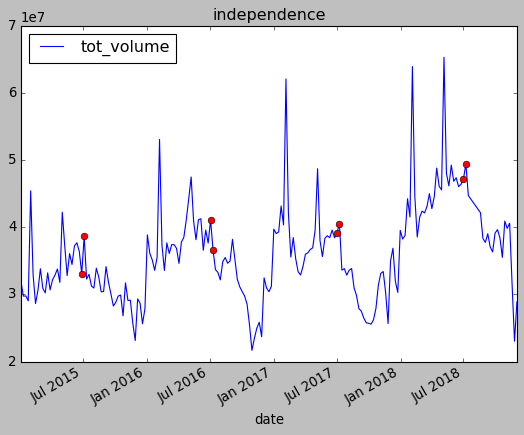

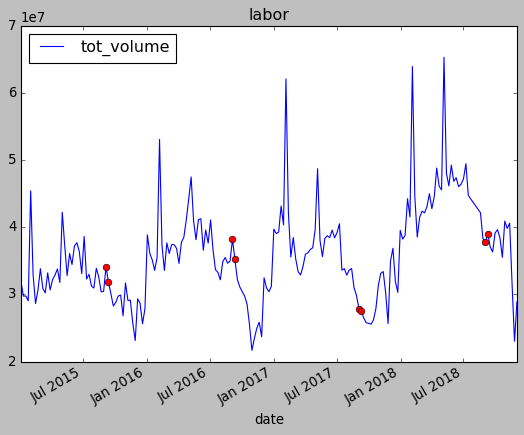

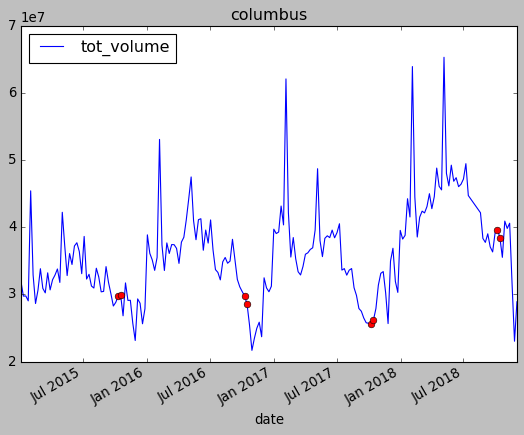

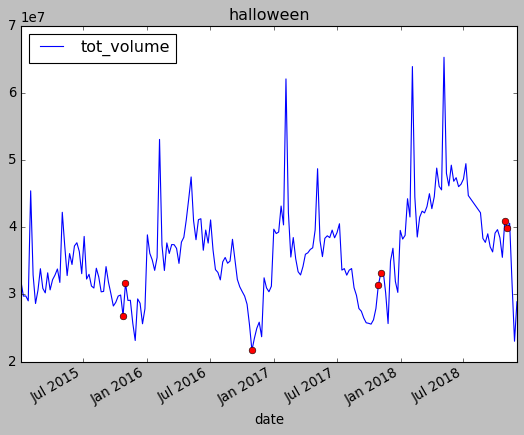

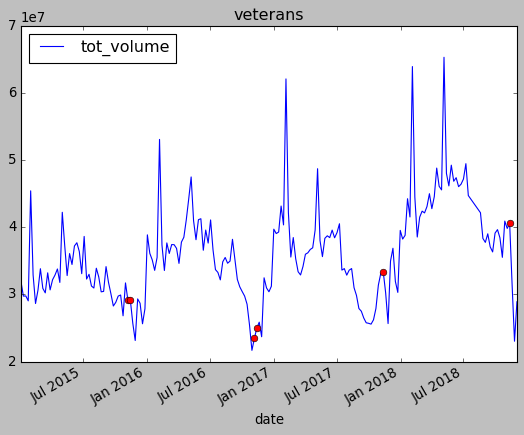

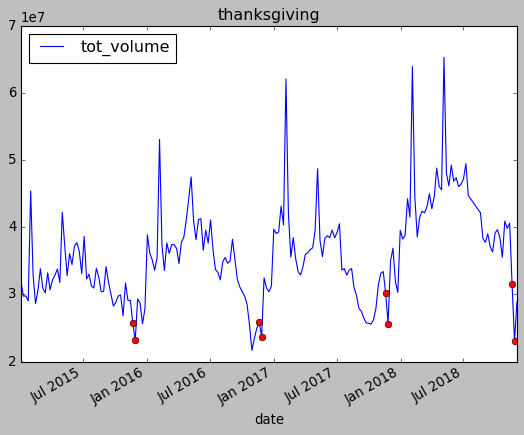

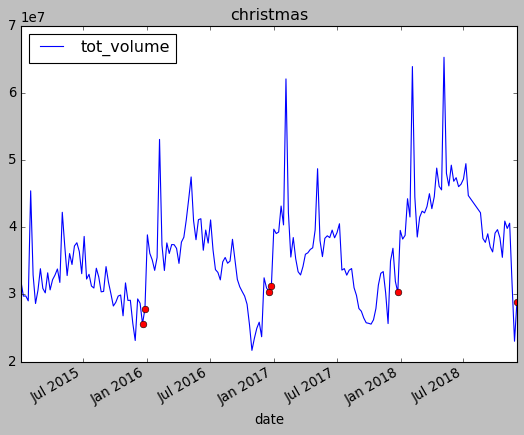

In [27]:
for day in holidays:
    # plot the total volume of avocados as line plot
    df.plot(y=['tot_volume'])
    # plot the holiday as red dots
    h_df = df[df['holiday']==day]
    plt.plot(h_df['tot_volume'],'ro')
    plt.title(day)
    plt.show()
    
df.drop('tot_volume',axis=1,inplace=True)

Looking at these plots, the holidays that seem to have the most impact on the volume of avocado sold are Mexico constitution and Cinco de Mayo.

## Plot the volume of each type of avocado 

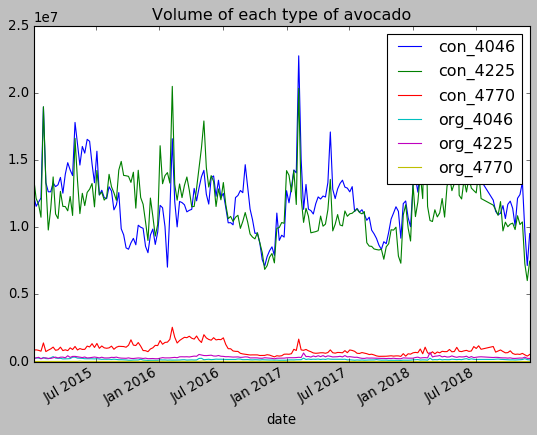

In [28]:
df.plot(y=['con_4046','con_4225','con_4770','org_4046','org_4225','org_4770'])
plt.title('Volume of each type of avocado')
plt.legend()
plt.show()

Types 4046 and 4225 are dominant.
I want to see if all types of avocados follow the same trend, so I will plot them on separated plots.

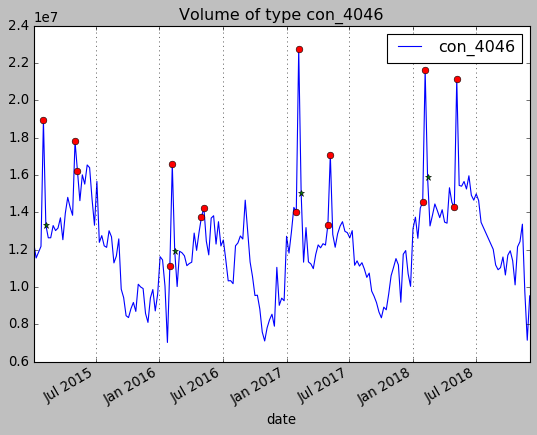

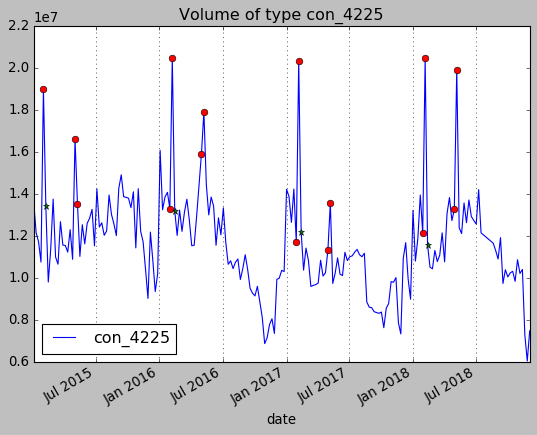

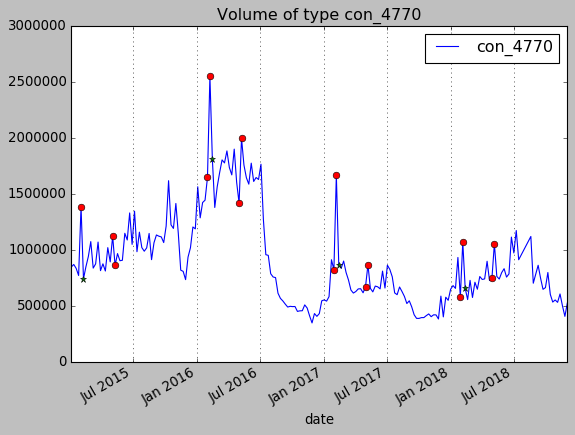

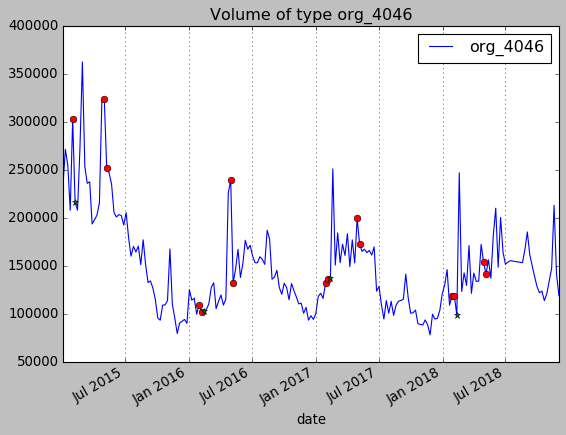

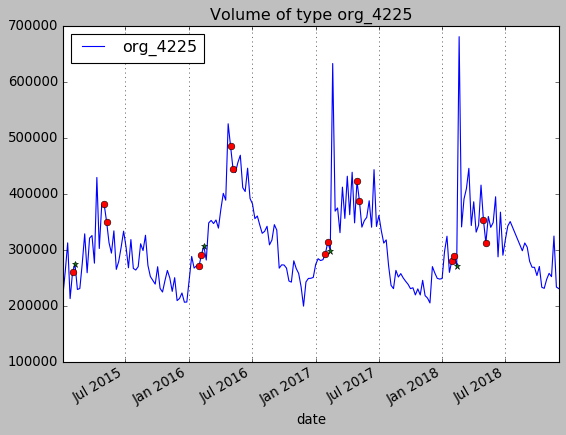

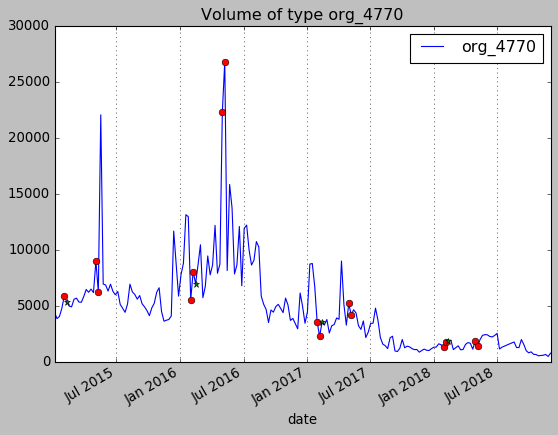

In [29]:
# Define a dataframe for superbowl and cinco de mayo only
h_df = df[(df['holiday']=='super bowl')|(df['holiday']=='cinco_mayo')]
h2_df = df[df['holiday']=='valentine']

for av_type in ['con_4046','con_4225','con_4770','org_4046','org_4225','org_4770']:
    df.plot(y=[av_type])
    plt.plot(h_df[av_type],'ro')
    plt.plot(h2_df[av_type],'g*') #Plot Valentine as green star (organic avocados)
    plt.title('Volume of type ' + av_type)
    plt.grid(axis='x')
    plt.show()



It seems that conventional avocados have peaks for Super Bowl and Cinco de Mayo.
However, it's not always the case for organic avocados.

Over years, we can notice that type 4770 (extra large avocados) are in decline for conventional and organic. I think the volume for these types of avocados will be more difficult to predict.

4225 type (large avocados) volume seems stable over the years.

4046 type (small/medium avocados) become more and more popular over years.

## Plot the volume of each size of bags

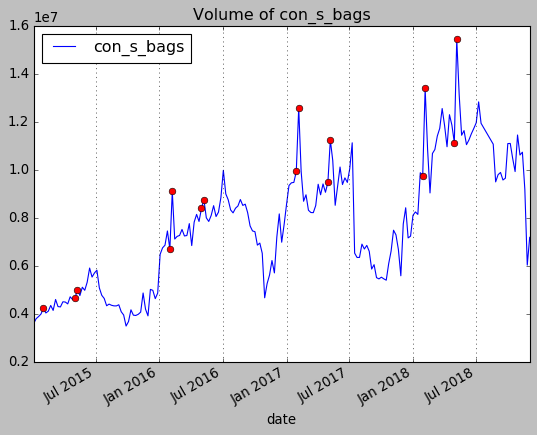

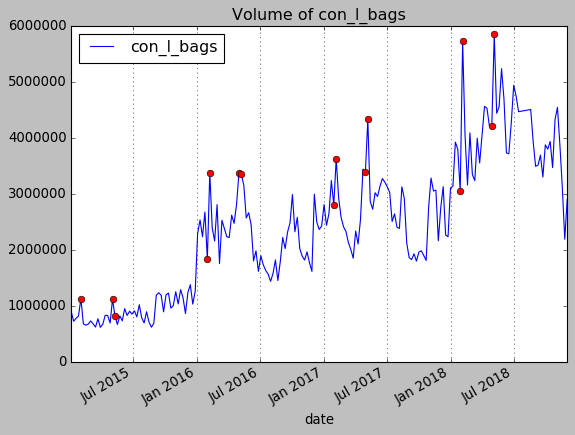

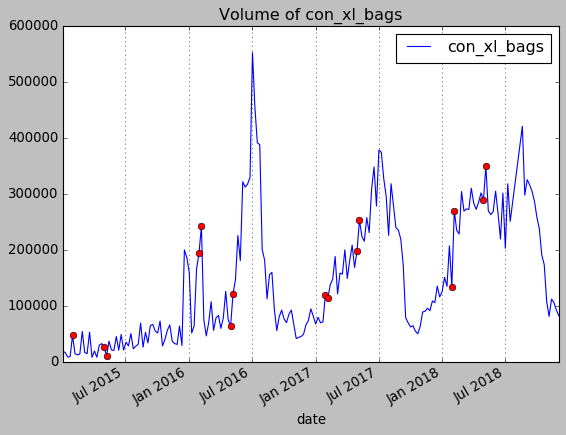

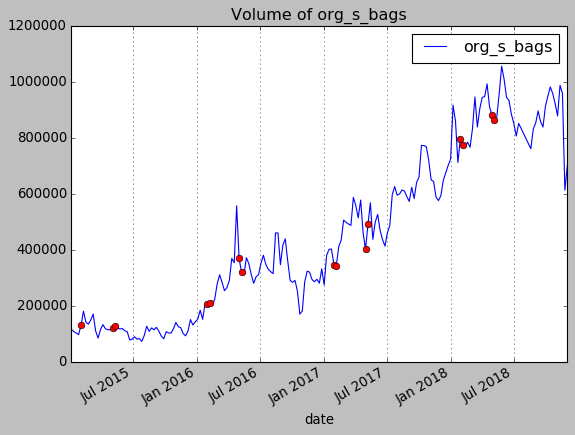

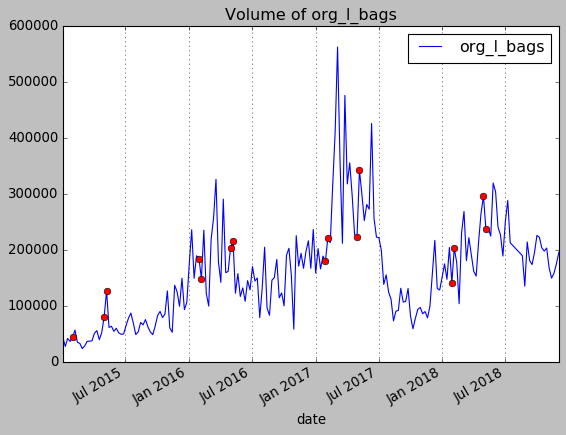

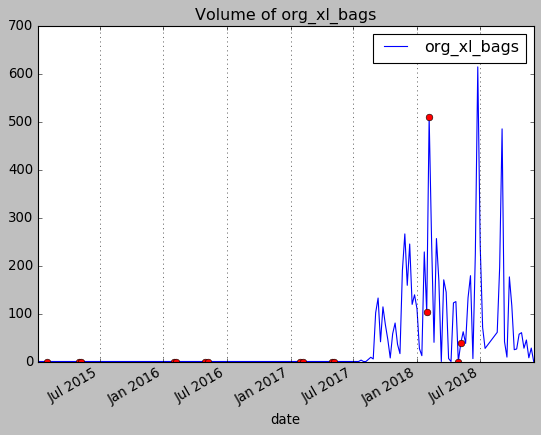

In [30]:
for av_bags in ['con_s_bags','con_l_bags','con_xl_bags','org_s_bags','org_l_bags','org_xl_bags']:
    df.plot(y=[av_bags])
    plt.plot(h_df[av_bags],'ro')
    plt.title('Volume of ' + av_bags)
    plt.grid(axis='x')
    plt.show()



It seems that conventional small and large bags follow the holiday pattern.
It's not obvious for the other bags.
However, they all follow the summer/winter trend.


## Plot the price for conventional and organic avocados

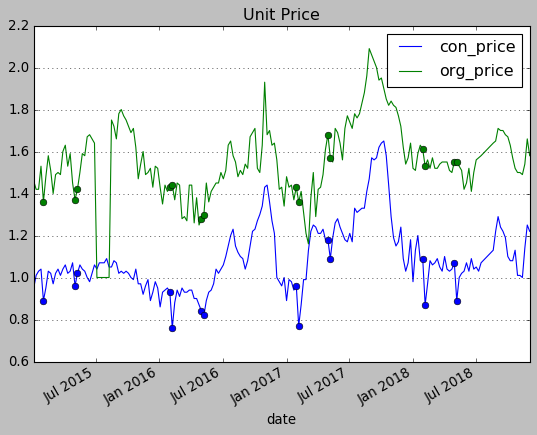

In [31]:
df.plot(y=['con_price','org_price'], title = 'Unit Price')
plt.plot(h_df['con_price'],'bo')
plt.plot(h_df['org_price'],'go')
plt.grid(axis='y')
plt.show()

- The price of avocados increases slightly over years, but the price difference between organic and conventional avocados remains consistent over years.
- The conventional avocado price is lower for the holidays, this could explain why the conventional avocado sales increase during these holidays
- The organic avocado sales remain stable.
- The price of avocados is higher in winter months, this is a good reason for buying less in winter.

## Plot a scatter plot price/volume for each category of avocado

In [32]:
import seaborn as sns

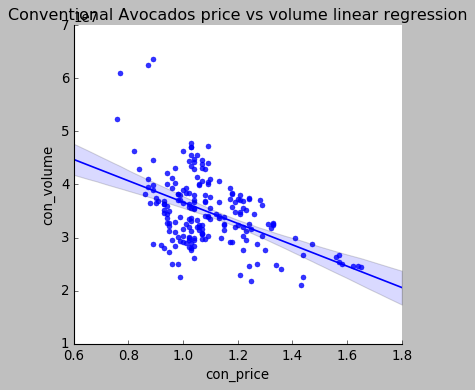

In [33]:
sns.lmplot(x='con_price', y='con_volume',data=df)
plt.title('Conventional Avocados price vs volume linear regression')
plt.show()

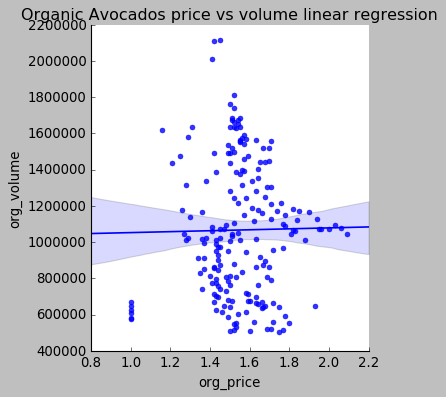

In [34]:
sns.lmplot(x='org_price', y='org_volume',data=df)
plt.title('Organic Avocados price vs volume linear regression')
plt.show()

There is a clear correlation between price and volume for conventional avocados.
But organic avocados customers seem less sensitive to price.

# Avocado project: Data Analysis

## Price / Volume Correlation

In [35]:
from scipy.stats import stats

In [36]:
# Calculate correlation and p_value for price and volume of conventional avocados
con_pv_corr = stats.pearsonr(df['con_volume'],df['con_price'])
print('Pearson correlation price/volume :',con_pv_corr)

Pearson correlation price/volume : (-0.48297300648833164, 3.832945144996813e-13)


The Pearson correlation coefficient shows a linear correlation between price and volume for conventional avocados. 

The p-value is below 0.05, so this correlation is not due to chance. It is statistically significant. We can reject the null hypothesis that price and volume are uncorrelated.

In [37]:
# Calculate correlation and p_value for price and volume of organic avocados
org_pv_corr = stats.pearsonr(df['org_volume'],df['org_price'])
print('Pearson correlation price/volume :',org_pv_corr)

Pearson correlation price/volume : (0.013310034460676958, 0.8512421879636564)


The Pearson correlation coefficient shows no linear correlation between price and volume.
We can't reject the null hypothesis that price and volume are uncorrelated.

When analyzing time series correlation, it's interesting to analyze the change from previous sample.
Because 2 time series that follow a trend may have a high correlation but no relationship.

In [38]:
# Calculate the percentage change for price and volume of conventional avocados
con_price_pctc = df['con_price'].pct_change().dropna()
con_volume_pctc = df['con_volume'].pct_change().dropna()

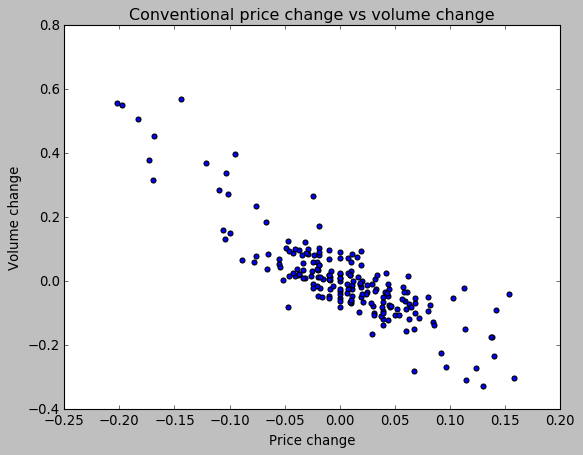

In [39]:
# plot the correlation
plt.scatter(con_price_pctc,con_volume_pctc)
plt.xlabel('Price change')
plt.ylabel('Volume change')
plt.title('Conventional price change vs volume change')
plt.show()

In [40]:
# Calculate correlation and p_value for price and volume of conventional avocados
con_pv_pctc_corr = stats.pearsonr(con_price_pctc,con_volume_pctc)
print('Pearson correlation price/volume change:',con_pv_pctc_corr)

Pearson correlation price/volume change: (-0.8612014708084987, 4.1961218451541634e-60)


The Pearson correlation coefficient shows a linear correlation between price change and volume change for conventional avocados.

In [41]:
# Calculate the percentage change for price and volume of organic avocados
org_price_pctc = df['org_price'].pct_change().dropna()
org_volume_pctc = df['org_volume'].pct_change().dropna()

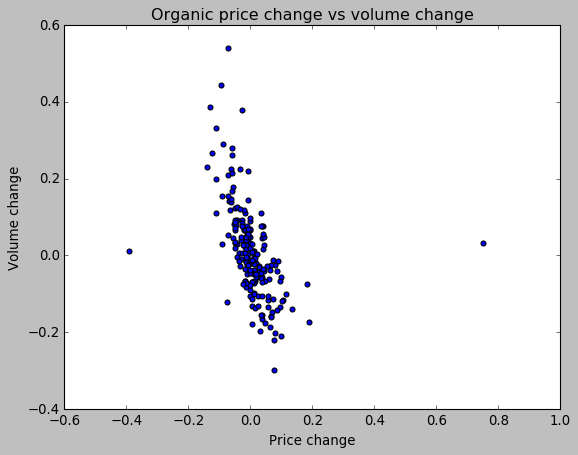

In [42]:
plt.scatter(org_price_pctc,org_volume_pctc)
plt.xlabel('Price change')
plt.ylabel('Volume change')
plt.title('Organic price change vs volume change')
plt.show()

In [43]:
# Calculate correlation and p_value for price and volume of organic avocados
org_pv_pctc_corr = stats.pearsonr(org_price_pctc,org_volume_pctc)
print('Pearson correlation price/volume change:',org_pv_pctc_corr)

Pearson correlation price/volume change: (-0.4560170556038038, 1.1550146856145069e-11)


The Pearson correlation shows a negative linear correlation between price change and volume change for organic avocados.
It means the price and volume vary together in opposite directions.

## Organic / Conventional correlation

First, analyze the volumes.

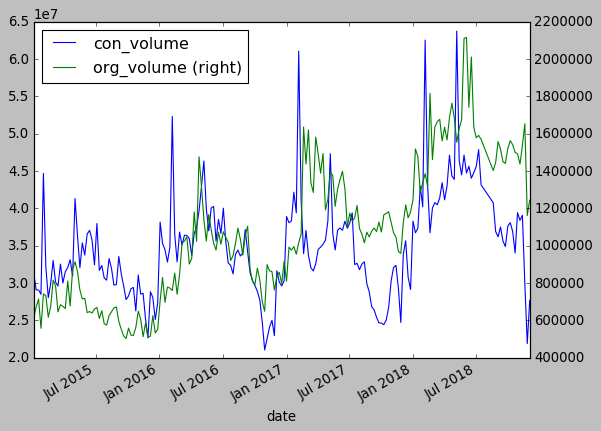

In [44]:
# Plot volumes for conventional and organic avocados
df_plot = df[['con_volume','org_volume']]
df_plot.plot(secondary_y='org_volume')
plt.show()

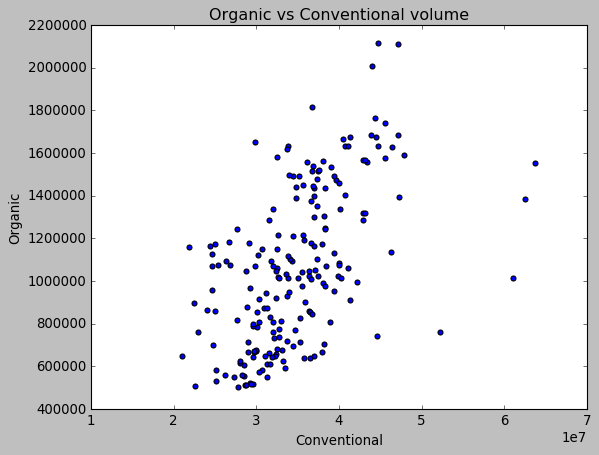

Pearson correlation : (0.5491094486568475, 3.167277133258241e-17)


In [45]:
# Plot volumes conventional / organic
plt.scatter(df['con_volume'],df['org_volume'])
plt.title('Organic vs Conventional volume')
plt.xlabel('Conventional')
plt.ylabel('Organic')
plt.show()
print('Pearson correlation :',stats.pearsonr(df['con_volume'],df['org_volume']))

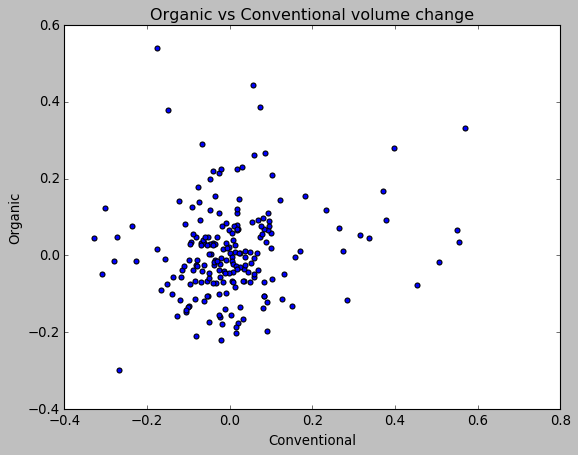

Pearson correlation : (0.15690464163614953, 0.026499000693574973)


In [46]:
# Plot volumes changes conventional / organic
plt.scatter(con_volume_pctc,org_volume_pctc)
plt.title('Organic vs Conventional volume change')
plt.xlabel('Conventional')
plt.ylabel('Organic')
plt.show()
print('Pearson correlation :',stats.pearsonr(con_volume_pctc,org_volume_pctc))

The Pearson correlation is low, and the p_value is low. We can reject the null hypothesis that the conventional and organic avocados volumes are not related.
The organic and conventional avocados volumes follow the same trend, they have a weak relationship.

Now, analyze the prices.

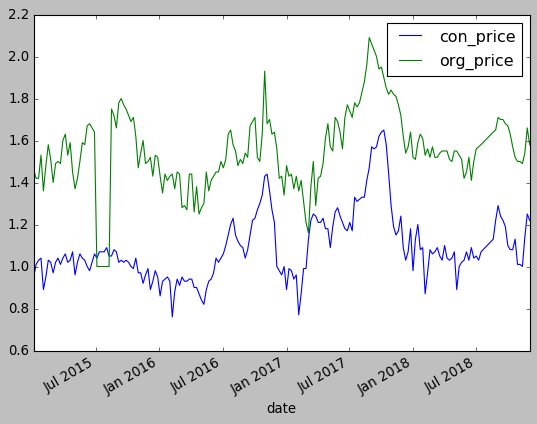

In [47]:
# Plot prices for conventional and organic avocados
df_plot = df[['con_price','org_price']]
df_plot.plot()
plt.show()

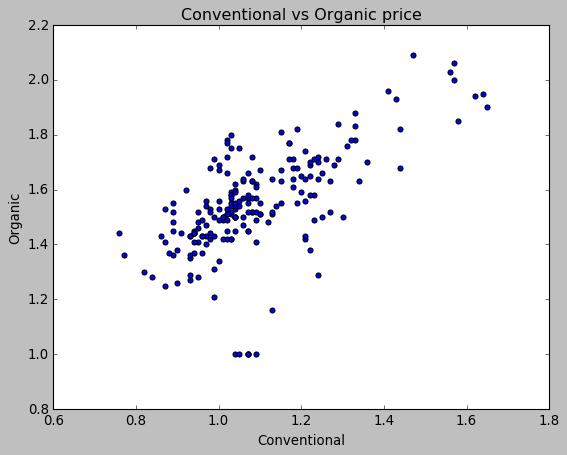

Pearson correlation : (0.6507556796563022, 1.369195047521585e-25)


In [48]:
# Plot prices conventional / organic
plt.scatter(df['con_price'],df['org_price'])
plt.title('Conventional vs Organic price')
plt.xlabel('Conventional')
plt.ylabel('Organic')
plt.show()
print('Pearson correlation :',stats.pearsonr(df['con_price'],df['org_price']))

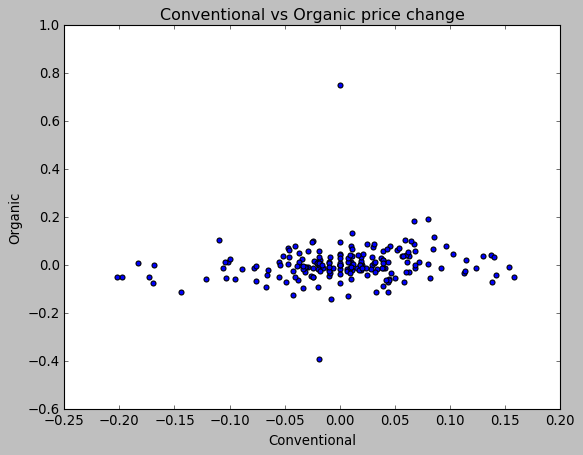

Pearson correlation : (0.14881074938857422, 0.035462759852570726)


In [49]:
# Plot price changes conventional / organic
plt.scatter(con_price_pctc,org_price_pctc)
plt.title('Conventional vs Organic price change')
plt.xlabel('Conventional')
plt.ylabel('Organic')
plt.show()
print('Pearson correlation :',stats.pearsonr(con_price_pctc,org_price_pctc))

p_value is below 0.05, so we can reject the null hypothesis that the time series are not correlated.

The conventional and organic avocados prices follow the same trend, and they are correlated.

## Heatmap to conclude the correlations analysis

In [50]:
# Plot heatmap to conclude these findings
df_pctc = pd.concat([con_price_pctc, con_volume_pctc, org_price_pctc, org_volume_pctc],axis='columns')

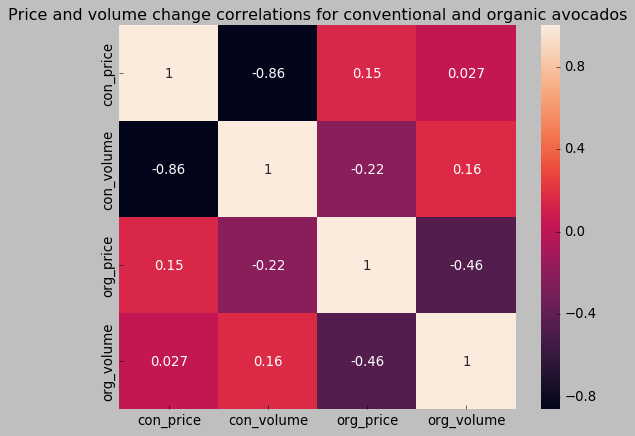

In [51]:
sns.heatmap(df_pctc.corr(), annot=True)
plt.title('Price and volume change correlations for conventional and organic avocados')
plt.show()

This heatmap concludes my findings: Although the times series seem to follow the same trend, only the price and volume time series are related.

# Additionnal plots for Milestone 1 report

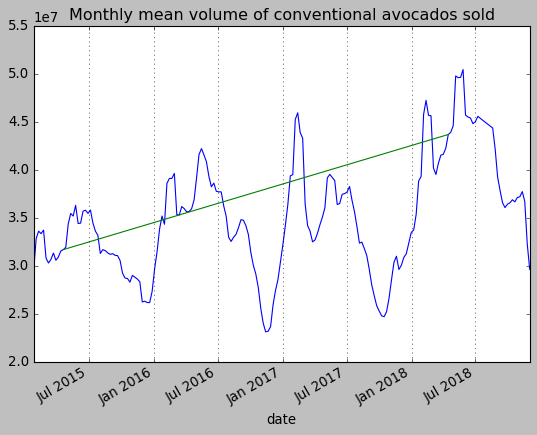

In [52]:
# Plot the monthly mean volume to smooth the plot and show seasonality
month_rolling = df['con_volume'].rolling(window=4).mean().dropna()
month_rolling.plot()
plt.grid(axis='x')
plt.plot(month_rolling.iloc[[12,12+52*3]])
plt.title('Monthly mean volume of conventional avocados sold')
plt.show()

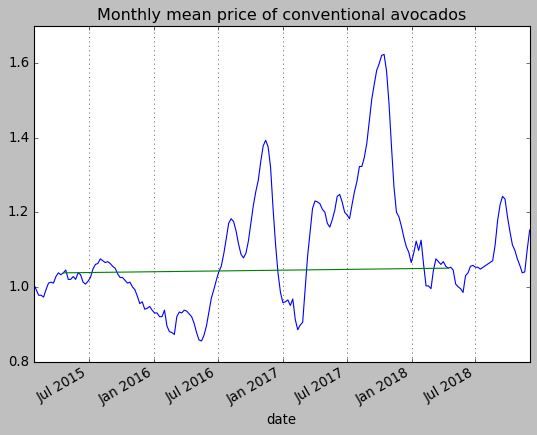

In [53]:
month_rolling= df['con_price'].rolling(window=4).mean().dropna()
month_rolling.plot()
plt.grid(axis='x')
plt.plot(month_rolling.iloc[[12,12+52*3]])
plt.title('Monthly mean price of conventional avocados')
plt.show()

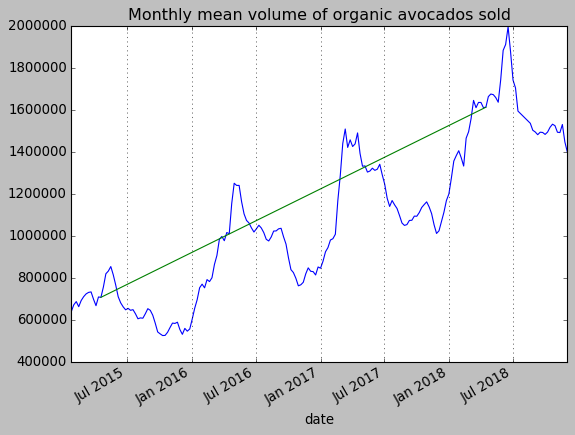

In [54]:
# Plot the monthly mean volume to smooth the plot and show seasonality
month_rolling = df['org_volume'].rolling(window=4).mean().dropna()
month_rolling.plot()
plt.grid(axis='x')
plt.plot(month_rolling.iloc[[12,12+52*3]])
plt.title('Monthly mean volume of organic avocados sold')
plt.show()

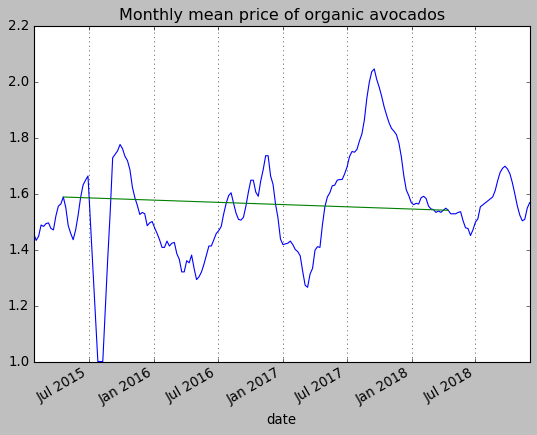

In [55]:
month_rolling = df['org_price'].rolling(window=4).mean().dropna()
month_rolling.plot()
plt.grid(axis='x')
plt.plot(month_rolling.iloc[[12,12+52*3]])
plt.title('Monthly mean price of organic avocados')
plt.show()

In [56]:
df['con_volume_pctc'] = con_volume_pctc

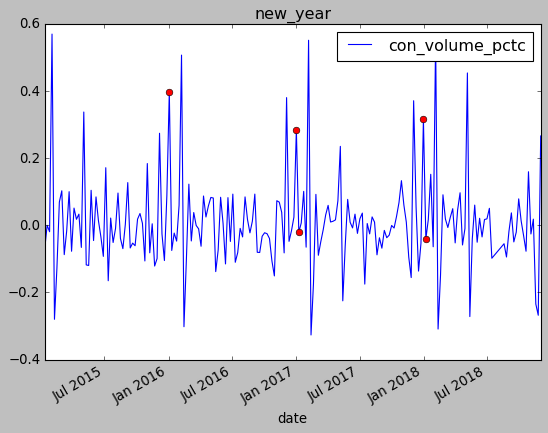

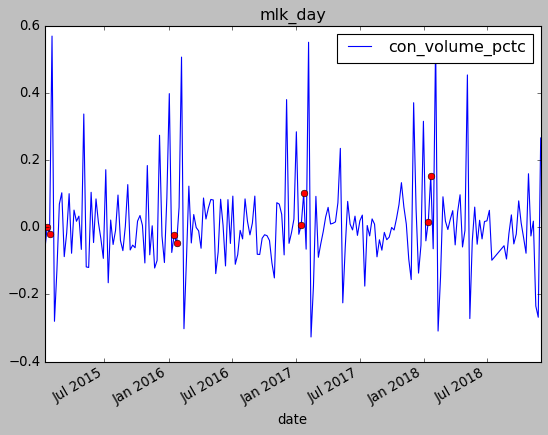

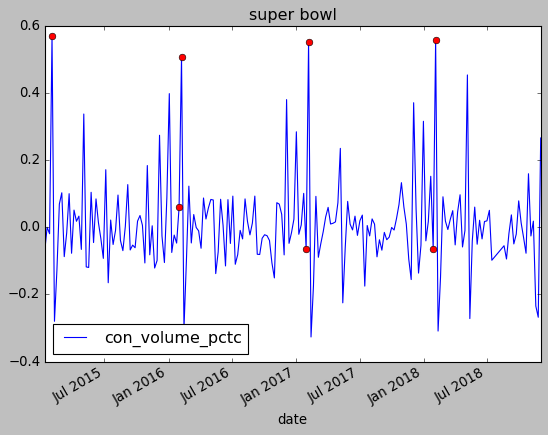

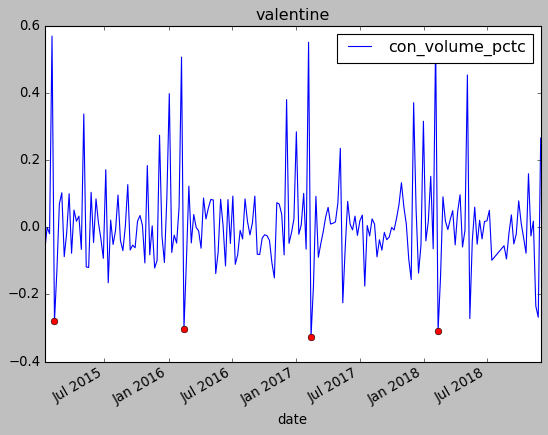

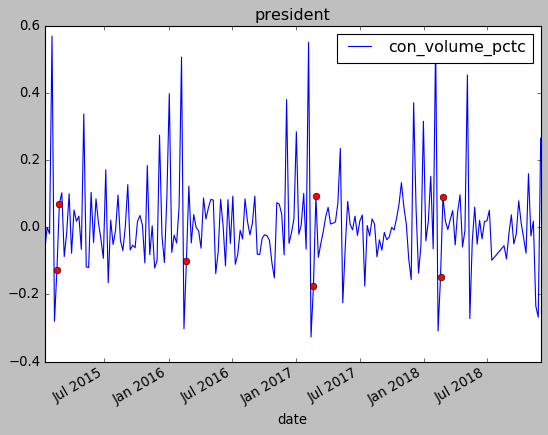

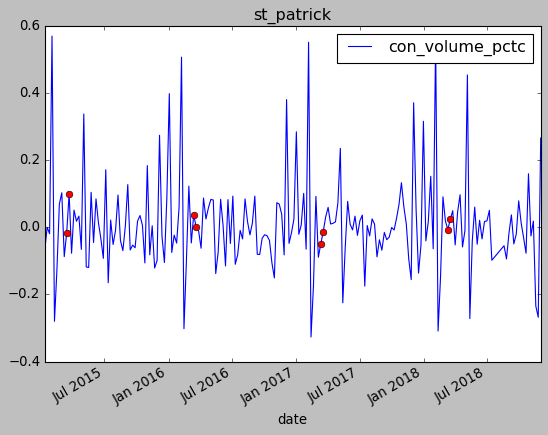

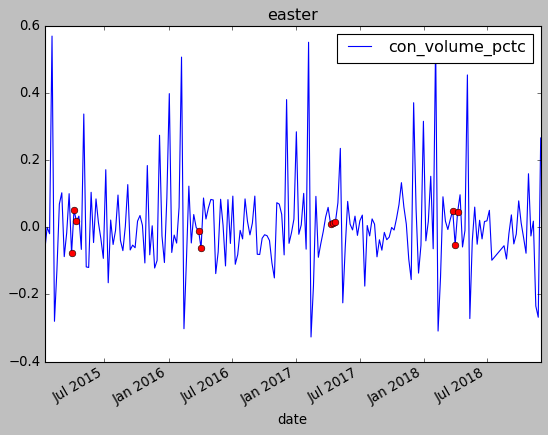

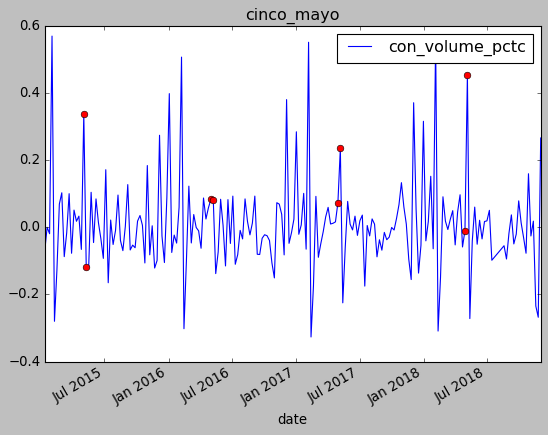

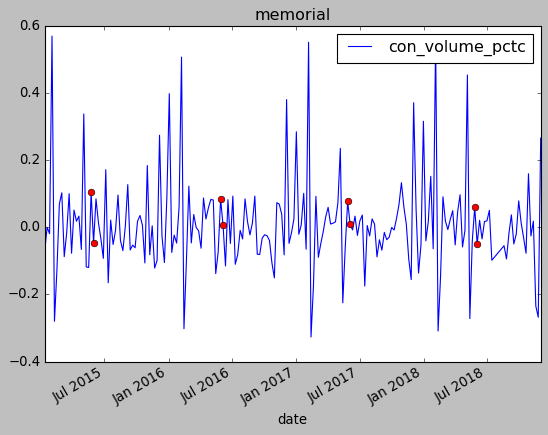

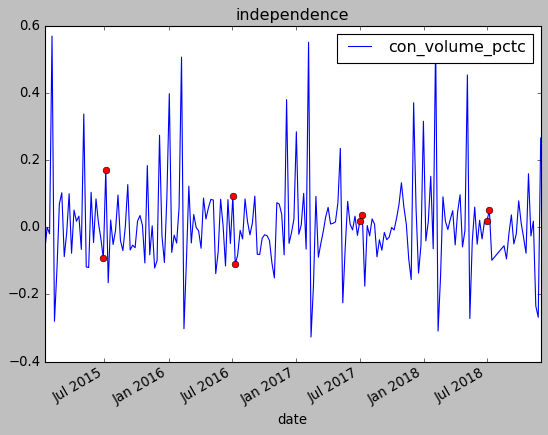

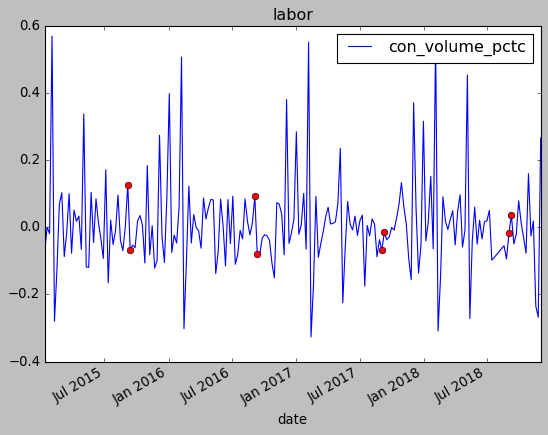

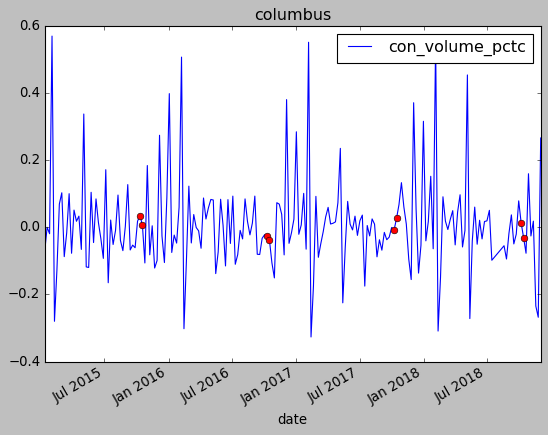

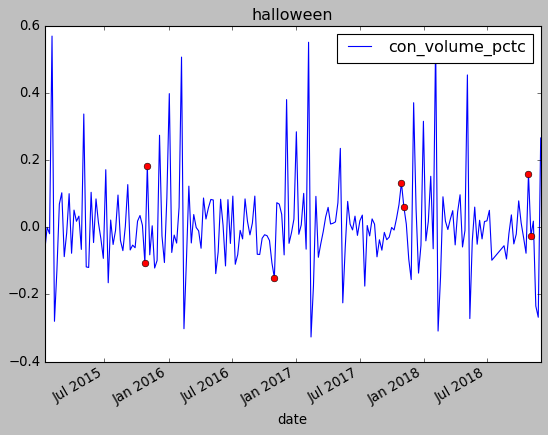

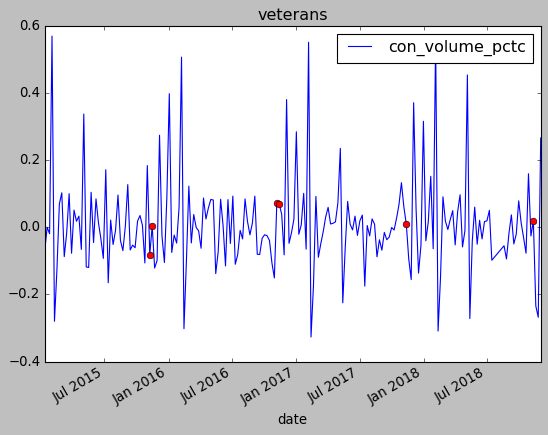

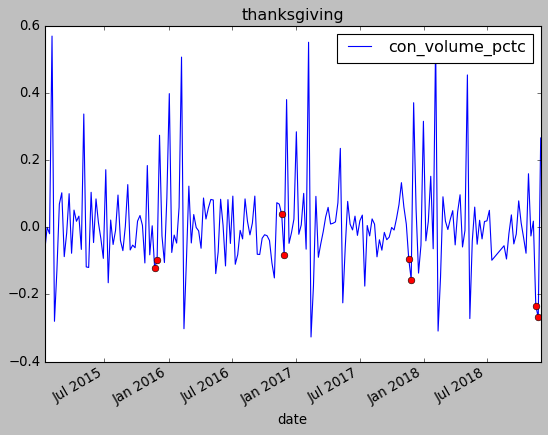

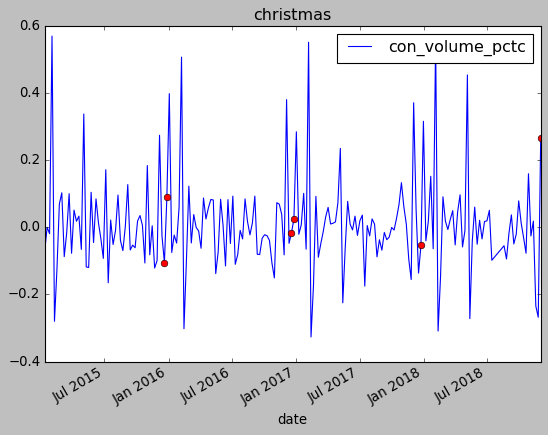

In [57]:
for day in holidays:
    # plot the volume change of avocados as line plot
    df.plot(y=['con_volume_pctc'])
    # plot the holiday as red dots
    h_df = df[df['holiday']==day]
    plt.plot(h_df['con_volume_pctc'],'ro')
    plt.title(day)
    plt.show()

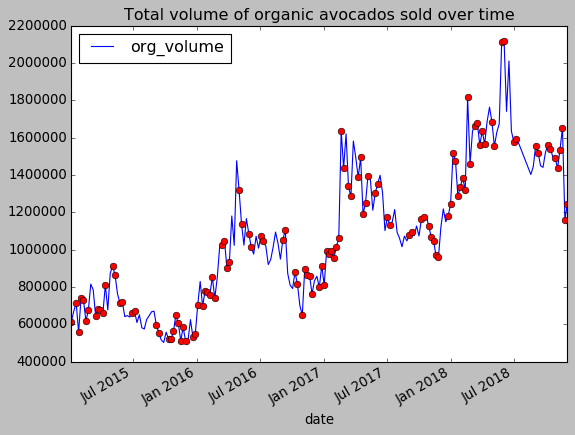

In [58]:
# plot the total volume of avocados as line plot
df.plot(y=['org_volume'])

# plot the holidays as red dots
h_df = df[df['holiday']!='']
plt.plot(h_df['org_volume'],'ro')

plt.title('Total volume of organic avocados sold over time')
plt.show()


# Avocado project: In Depth Analysis

Use FB Prophet to predict the volume of traditional avocados sold.
FB prophet is a Generalized Additive Model. Its predictions are based on the addition of 3 components: 
- trend (models non periodic changes)
    We saw that the volume increases over the years
- seasonality (models periodic changes)
    We saw that less avocados are sold in winter
- holidays effect
    We saw peaks for the superbowl and for cinco de mayo.
    
For these reasons, I think FB Prophet should be a good model for my dataset.

Here are the sources for FB Prophet documentation:

https://facebook.github.io/prophet/docs/diagnostics.html

https://peerj.com/preprints/3190.pdf

https://pythondata.com/forecasting-time-series-data-with-prophet-part-1/

In [59]:
from fbprophet import Prophet

In [60]:
from sklearn.metrics import r2_score

I found that some data is missing in year 2018. I need to resample df to fill this data before working on it.

In [61]:
df['2018-07-08':'2018-09-01']

con_price   con_volume     con_4046     con_4225    con_4770  \
date                                                                       
2018-07-08       1.03  47848189.79  14624443.74  14184132.58  1169255.61   
2018-07-15       1.07  43126773.22  13457479.92  12125207.59   908599.10   
2018-08-19       1.13  40735732.68  12009246.19  11634725.16  1116318.45   
2018-08-26       1.22  36867974.58  11171123.21  11286479.97   699010.18   

               con_bags   con_s_bags  con_l_bags  con_xl_bags  org_price  \
date                                                                       
2018-07-08  17870357.86  12817172.90  4735852.45    317332.51       1.57   
2018-07-15  16635486.61  11924570.43  4460656.29    250259.89       1.58   
2018-08-19  15975442.88  11055173.29  4500204.69    420064.90       1.64   
2018-08-26  13711361.22   9484135.03  3930111.90    297114.29       1.65   

            org_volume   org_4046   org_4225  org_4770    org_bags  \
date                                                                 
2018-07-08  1589877.42  153518.59  341813.38   1115.90  1092704.92   
2018-07-15  1568944.98  155018.27  349923.01   1277.10  1062513.79   
2018-08-19  1401564.09  152939.89  297706.16   1745.31   948992.75   
2018-08-26  1444798.30  166581.33  311652.30   1248.17   965140.20   

            org_s_bags  org_l_bags  org_xl_bags       holiday  con_volume_pctc  
date                                                                            
2018-07-08   805225.83   287408.34        70.75  independence         0.049930  
2018-07-15   850384.88   212101.67        27.24                      -0.098675  
2018-08-19   759918.27   189013.68        60.80                      -0.055442  
2018-08-26   830395.38   134548.43       196.39                      -0.094948

In [62]:
df = df.resample('W').interpolate()
df.holiday.fillna('',inplace=True) # no holidays between 2018-07-22 and 2018-08-19
df['2018-07-08':'2018-09-01']

con_price    con_volume      con_4046      con_4225    con_4770  \
date                                                                          
2018-07-08      1.030  4.784819e+07  1.462444e+07  1.418413e+07  1169255.61   
2018-07-15      1.070  4.312677e+07  1.345748e+07  1.212521e+07   908599.10   
2018-07-22      1.082  4.264857e+07  1.316783e+07  1.202711e+07   950142.97   
2018-07-29      1.094  4.217036e+07  1.287819e+07  1.192901e+07   991686.84   
2018-08-05      1.106  4.169215e+07  1.258854e+07  1.183092e+07  1033230.71   
2018-08-12      1.118  4.121394e+07  1.229889e+07  1.173282e+07  1074774.58   
2018-08-19      1.130  4.073573e+07  1.200925e+07  1.163473e+07  1116318.45   
2018-08-26      1.220  3.686797e+07  1.117112e+07  1.128648e+07   699010.18   

                con_bags    con_s_bags  con_l_bags  con_xl_bags  org_price  \
date                                                                         
2018-07-08  1.787036e+07  1.281717e+07  4735852.45   317332.510      1.570   
2018-07-15  1.663549e+07  1.192457e+07  4460656.29   250259.890      1.580   
2018-07-22  1.650348e+07  1.175069e+07  4468565.97   284220.892      1.592   
2018-07-29  1.637147e+07  1.157681e+07  4476475.65   318181.894      1.604   
2018-08-05  1.623946e+07  1.140293e+07  4484385.33   352142.896      1.616   
2018-08-12  1.610745e+07  1.122905e+07  4492295.01   386103.898      1.628   
2018-08-19  1.597544e+07  1.105517e+07  4500204.69   420064.900      1.640   
2018-08-26  1.371136e+07  9.484135e+06  3930111.90   297114.290      1.650   

             org_volume    org_4046   org_4225  org_4770     org_bags  \
date                                                                    
2018-07-08  1589877.420  153518.590  341813.38  1115.900  1092704.920   
2018-07-15  1568944.980  155018.270  349923.01  1277.100  1062513.790   
2018-07-22  1535468.802  154602.594  339479.64  1370.742  1039809.582   
2018-07-29  1501992.624  154186.918  329036.27  1464.384  1017105.374   
2018-08-05  1468516.446  153771.242  318592.90  1558.026   994401.166   
2018-08-12  1435040.268  153355.566  308149.53  1651.668   971696.958   
2018-08-19  1401564.090  152939.890  297706.16  1745.310   948992.750   
2018-08-26  1444798.300  166581.330  311652.30  1248.170   965140.200   

            org_s_bags  org_l_bags  org_xl_bags       holiday  con_volume_pctc  
date                                                                            
2018-07-08  805225.830  287408.340       70.750  independence         0.049930  
2018-07-15  850384.880  212101.670       27.240                      -0.098675  
2018-07-22  832291.558  207484.072       33.952                      -0.090028  
2018-07-29  814198.236  202866.474       40.664                      -0.081382  
2018-08-05  796104.914  198248.876       47.376                      -0.072735  
2018-08-12  778011.592  193631.278       54.088                      -0.064089  
2018-08-19  759918.270  189013.680       60.800                      -0.055442  
2018-08-26  830395.380  134548.430      196.390                      -0.094948

I plan to use years 2015, 2016 and 2017 as training data and 2018 as test data.

In [63]:
df_train = df.loc[:'2017-12-31']
df_test = df.loc['2018-01-01':]

First, I create the dataframe for FB Prophet, with a column 'ds' for datestamp and a column 'y' for volume.

In [64]:
cv_train = df_train[['con_volume']]
cv_train.reset_index(inplace=True)
cv_train.columns=['ds','y']
cv_train.tail()

ds            y
152 2017-12-03  33824253.00
153 2017-12-10  35634913.01
154 2017-12-17  30757767.03
155 2017-12-24  29102349.33
156 2017-12-31  38267341.61

I don't use the built-in country holidays because my data is weekly.

Create the dataframe for FB Prophet holidays, with a column 'ds' and a column 'holiday'.
I don't need to use 'lower_window' and 'upper_window' because my data is weekly, and I already created a window around the actual holidays.

This dataframe contains holidays for all 4 years because it will be used for both training and prediction.

In [65]:
holidays = df[['holiday']]
holidays.reset_index(inplace=True)
holidays.columns=['ds','holiday']
holidays = holidays[holidays.holiday!='']
holidays.head()

ds     holiday
0 2015-01-04    new_year
2 2015-01-18     mlk_day
3 2015-01-25     mlk_day
4 2015-02-01  super bowl
5 2015-02-08   valentine

Train an instance of FB Prophet on the training data.

In [66]:
cv_model = Prophet(holidays=holidays,weekly_seasonality=False, daily_seasonality=False)

In [67]:
cv_model.fit(cv_train)

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


I create a dataframe to predict the future volume over a period of 52 weeks. 

In [68]:
cv_future = cv_model.make_future_dataframe(periods=52,freq='W')
cv_future.tail()

ds
204 2018-12-02
205 2018-12-09
206 2018-12-16
207 2018-12-23
208 2018-12-30

I predict the volume for years 2015 to 2018

In [69]:
cv_forecast = cv_model.predict(cv_future)

This is the prediction of the model with the confidence intervals on the training data.
The actual datapoints are black dots for the training data, and red dots for the test data.

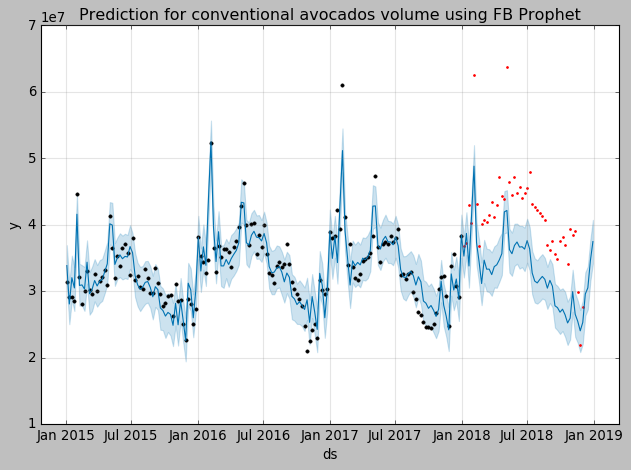

In [70]:
fig,ax = plt.subplots()
cv_model.plot(cv_forecast,ax=ax)
ax.scatter(df_test.index,df_test.con_volume,color='red',s=2)
plt.title('Prediction for conventional avocados volume using FB Prophet')
plt.show()

I see that the estimation looks good for the training data, but is under estimated for the test data.
But, this plot shows an increase of the mean volume in 2018.

This is rather an over performance in 2018, than an underestimation.

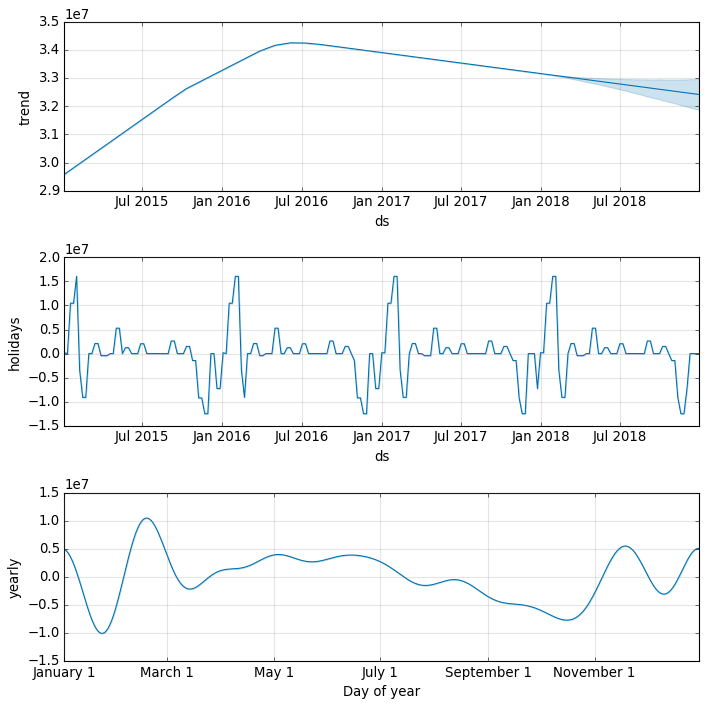

In [71]:
cv_model.plot_components(cv_forecast)
plt.show()

The yearly seasonality shows that the volume goes down in winter.

The holidays shows peaks for Super Bowl and Cinco de Mayo.
It shows also drops for the winter holidays. Maybe the holidays effect has superseded the seasonality effect. I could try to use only Super Bowl and Cinco de Mayo as holidays.

The trend shows that the model did not see the 2018 increase, which is normal because it was not in the training data.

In [72]:
# This function computes the scores 
def compute_score(yhat_array, y_array, row):
    size = len(y_array)
    score_df = pd.DataFrame(index=[row],columns=['MAE','MAPE(%)','R2'])
    score_df['MAE'][row] = np.sum(np.abs(y_array - yhat_array)) / size
    score_df['MAPE(%)'][row] = np.sum(np.abs((y_array - yhat_array)/y_array)) / size *100
    score_df['R2'][row] = r2_score(y_array,yhat_array)
    return score_df

In [73]:
score = compute_score(cv_forecast['yhat'][:205].values,df['con_volume'].values,'overall score')
score = score.append(compute_score(cv_forecast['yhat'][:157].values,df['con_volume'][:157].values,'training score'))
score = score.append(compute_score(cv_forecast['yhat'][157:205].values,df['con_volume'][157:].values,'test score'))
score

MAE  MAPE(%)        R2
overall score   3.33836e+06  8.96383   0.47739
training score   1.8399e+06  5.71208  0.795903
test score      8.23958e+06  19.5998 -0.787764

The scores reflect what I saw on the plot.

The results are good for the training data, but not for the test data.

I will check if the data is stationary, because if it's not, I could log transform it to improve the performance.

In [74]:
from statsmodels.tsa.stattools import adfuller

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [75]:
results = adfuller(df['con_volume'])

In [76]:
results

(-3.0068552999728757,
 0.03425914214702808,
 15,
 189,
 {'1%': -3.4654311561944873,
  '10%': -2.574988319755886,
  '5%': -2.8769570530458792},
 6322.737817290475)

The Augmented Dickey Fuller test score (-3) is negative, with a p-value 0.03. This means the data is stationary.

To improve the results, I will try to model multiplicative changes instead of additive ones.
I do that with a log transform.

In [77]:
cv_model = Prophet(holidays=holidays,weekly_seasonality=False, daily_seasonality=False)

In [78]:
cv_train_log = cv_train.copy()
cv_train_log.y = np.log(cv_train.y)

In [79]:
cv_model.fit(cv_train_log)

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [80]:
cv_forecast_log = cv_model.predict(cv_future)

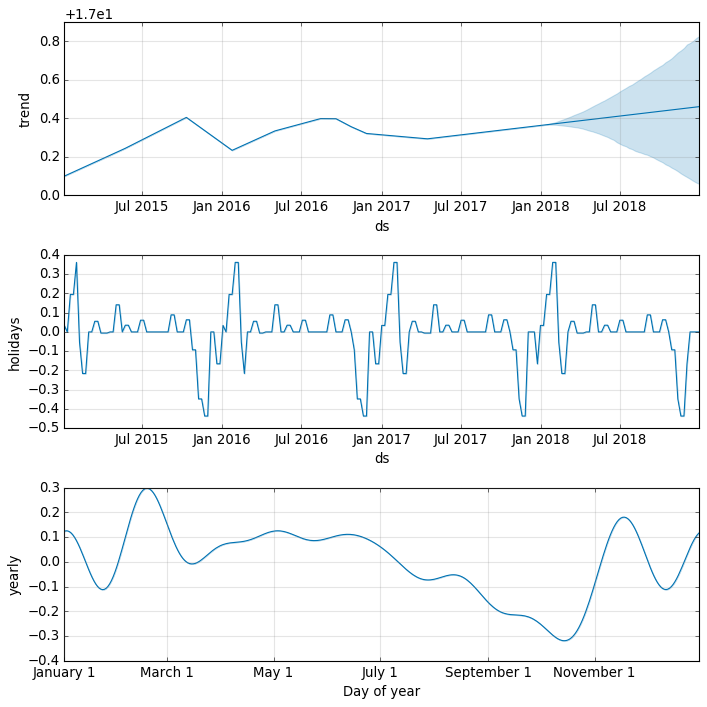

In [81]:
cv_model.plot_components(cv_forecast_log)
plt.show()

The trend component is going up for 2018.

In [82]:
cv_forecast = cv_forecast_log.copy()
cv_forecast.yhat_lower = np.exp(cv_forecast_log.yhat_lower)
cv_forecast.yhat_upper = np.exp(cv_forecast_log.yhat_upper)
cv_forecast.yhat = np.exp(cv_forecast_log.yhat)

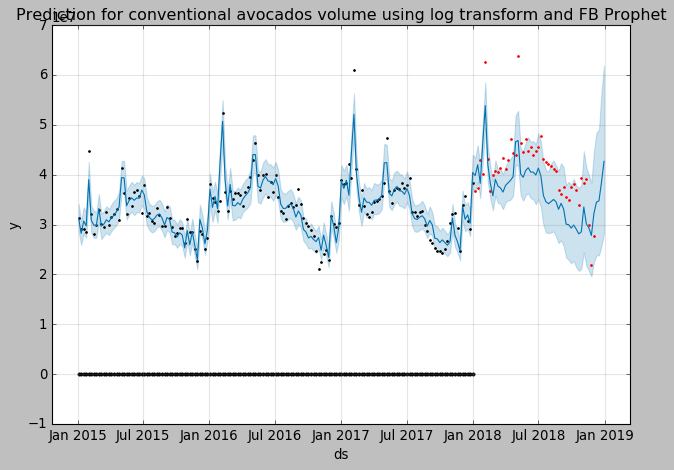

In [83]:
fig,ax = plt.subplots()
cv_model.plot(cv_forecast,ax=ax)
ax.scatter(df_test.index,df_test.con_volume,color='red',s=2)
ax.scatter(df_train.index,df_train.con_volume,color='black',s=2)
plt.title('Prediction for conventional avocados volume using log transform and FB Prophet')
plt.show()

The results seem better.
The changes in the volume are better predicted with a multiplicative model.

In [84]:
score = score.append(compute_score(cv_forecast['yhat'][:205].values,df['con_volume'].values,'log transform overall score'))
score = score.append(compute_score(cv_forecast['yhat'][:157].values,df['con_volume'][:157].values,'log transform training score'))
score = score.append(compute_score(cv_forecast['yhat'][157:205].values,df['con_volume'][157:].values,'log transform test score'))
score

MAE  MAPE(%)        R2
overall score                 3.33836e+06  8.96383   0.47739
training score                 1.8399e+06  5.71208  0.795903
test score                    8.23958e+06  19.5998 -0.787764
log transform overall score   2.54717e+06  6.94874  0.722405
log transform training score  1.63459e+06  4.96443  0.839811
log transform test score      5.53205e+06  13.4391  0.164596

The score is much better !

I will now try to give more weight to Cinco de Mayo and the Super Bowl.

In [85]:
holi_sb_cm = holidays[holidays.holiday=='super bowl']
holi_sb_cm = holi_sb_cm.append(holidays[holidays.holiday=='cinco_mayo'])
holi_sb_cm['prior_scale'] = 40

In [86]:
holi_prior = holidays[holidays.holiday!='super bowl']
holi_prior = holi_prior[holi_prior.holiday!='cinco_mayo']
holi_prior['prior_scale'] = 10
holi_prior = holi_prior.append(holi_sb_cm)

In [87]:
cv_model = Prophet(holidays=holi_prior,weekly_seasonality=False, daily_seasonality=False)

In [88]:
cv_model.fit(cv_train_log)

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [89]:
cv_forecast_log = cv_model.predict(cv_future)

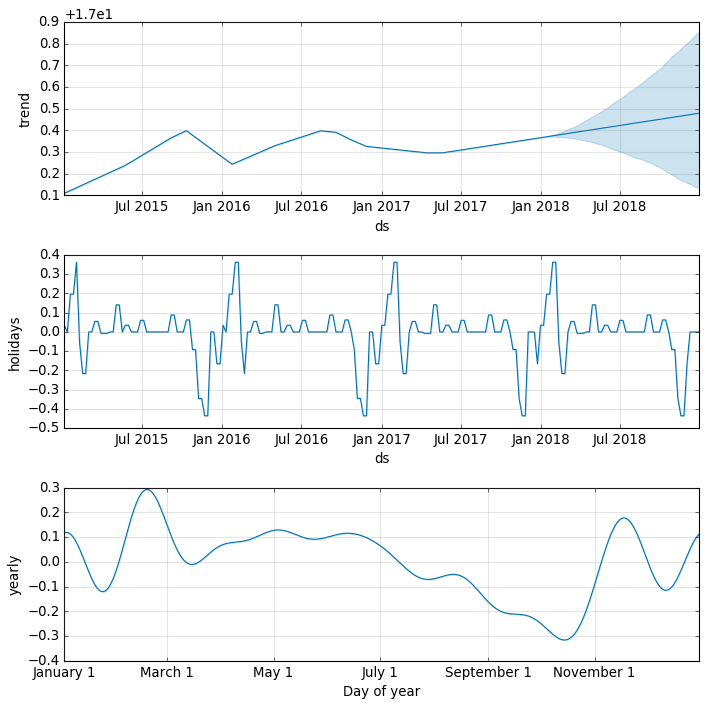

In [90]:
cv_model.plot_components(cv_forecast_log)
plt.show()

Let's plot the results.

In [91]:
cv_forecast = cv_forecast_log.copy()
cv_forecast.yhat_lower = np.exp(cv_forecast_log.yhat_lower)
cv_forecast.yhat_upper = np.exp(cv_forecast_log.yhat_upper)
cv_forecast.yhat = np.exp(cv_forecast_log.yhat)

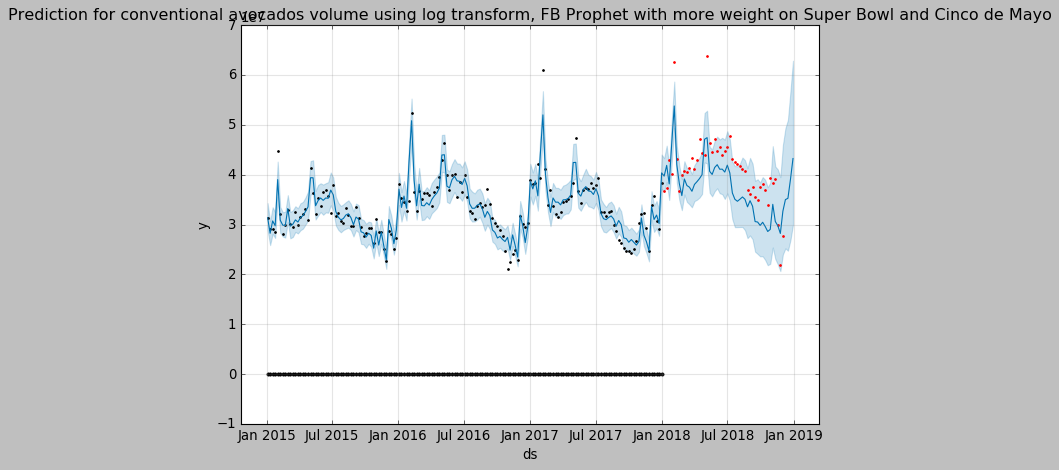

In [92]:
fig,ax = plt.subplots()
cv_model.plot(cv_forecast,ax=ax)
ax.scatter(df_test.index,df_test.con_volume,color='red',s=2)
ax.scatter(df_train.index,df_train.con_volume,color='black',s=2)
plt.title('Prediction for conventional avocados volume using log transform, FB Prophet with more weight on Super Bowl and Cinco de Mayo')
plt.show()

In [93]:
score = score.append(compute_score(cv_forecast['yhat'][:205].values,df['con_volume'].values,'holiday prior overall score'))
score = score.append(compute_score(cv_forecast['yhat'][:157].values,df['con_volume'][:157].values,'holiday prior training score'))
score = score.append(compute_score(cv_forecast['yhat'][157:205].values,df['con_volume'][157:].values,'holiday prior test score'))
score

MAE  MAPE(%)        R2
overall score                 3.33836e+06  8.96383   0.47739
training score                 1.8399e+06  5.71208  0.795903
test score                    8.23958e+06  19.5998 -0.787764
log transform overall score   2.54717e+06  6.94874  0.722405
log transform training score  1.63459e+06  4.96443  0.839811
log transform test score      5.53205e+06  13.4391  0.164596
holiday prior overall score   2.48101e+06  6.80373   0.74149
holiday prior training score   1.6502e+06  5.01521  0.837426
holiday prior test score      5.19843e+06  12.6537  0.251581

This prior that gives more weight to the Super Bowl and Cinco de Mayo has improved the results.

I would like to compare these results with a plain Auto Regressive Model.

In [94]:
from pandas.core import datetools
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

I will plot the Autocorrelation and Partial Autocorrelation to find the order of the model.

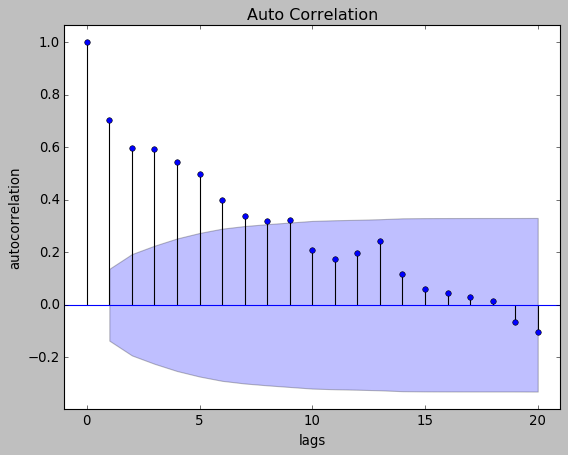

In [95]:
plot_acf(df[['con_volume']], lags=20)
plt.title('Auto Correlation')
plt.xlabel('lags')
plt.ylabel('autocorrelation')
plt.show()

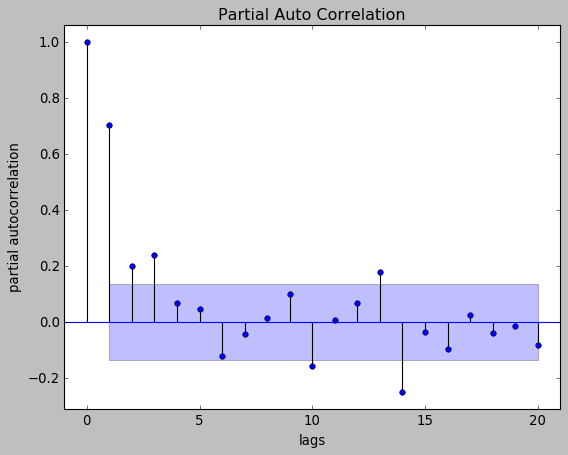

In [96]:
plot_pacf(df[['con_volume']], lags=20)
plt.title('Partial Auto Correlation')
plt.xlabel('lags')
plt.ylabel('partial autocorrelation')
plt.show()

Looking at these plots, I will try an AR model with order=3.
ACF shows a strong correlation up to lag 3, then trailing off.
PACF shows a strong correlation up to lag 3, then no correlation.

In [97]:
ARMA_train = df_train[['con_volume']]
ARMA_test = df_test[['con_volume']]

In [98]:
ARMA_train_log = np.log(ARMA_train)

In [99]:
ARMA_model = ARMA(ARMA_train_log, order=(3,0))
res = ARMA_model.fit()

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [100]:
ARMA_pred = np.exp(res.predict(start='2015-01-04', end='2018-12-02'))

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


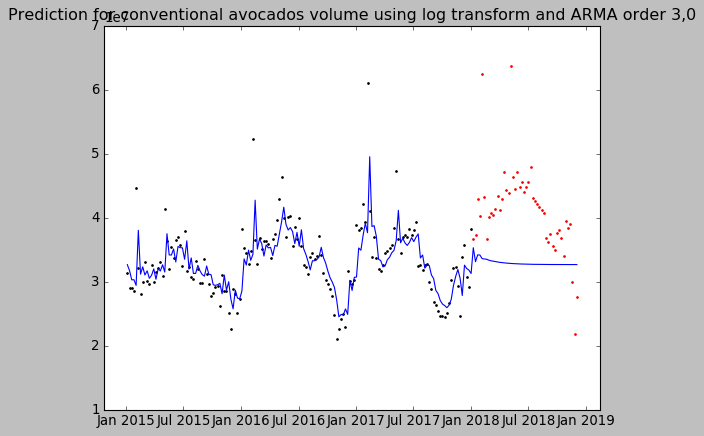

In [101]:
plt.plot(ARMA_pred.index,ARMA_pred.values,color='blue')
plt.scatter(ARMA_train.index,ARMA_train.con_volume,color='black',s=2)
plt.scatter(ARMA_test.index,ARMA_test.con_volume,color='red',s=2)
plt.title('Prediction for conventional avocados volume using log transform and ARMA order 3,0')
plt.show()

AR model is not good for long horizon.

In [102]:
score = score.append(compute_score(ARMA_pred[:205].values,df['con_volume'].values,'AR overall score'))
score = score.append(compute_score(ARMA_pred[:157].values,df['con_volume'][:157].values,'AR training score'))
score = score.append(compute_score(ARMA_pred[157:205].values,df['con_volume'][157:].values,'AR test score'))
score

MAE  MAPE(%)        R2
overall score                 3.33836e+06  8.96383   0.47739
training score                 1.8399e+06  5.71208  0.795903
test score                    8.23958e+06  19.5998 -0.787764
log transform overall score   2.54717e+06  6.94874  0.722405
log transform training score  1.63459e+06  4.96443  0.839811
log transform test score      5.53205e+06  13.4391  0.164596
holiday prior overall score   2.48101e+06  6.80373   0.74149
holiday prior training score   1.6502e+06  5.01521  0.837426
holiday prior test score      5.19843e+06  12.6537  0.251581
AR overall score              4.20479e+06  10.9873  0.149696
AR training score               2.751e+06  7.98258  0.459339
AR test score                 8.95991e+06  20.8153   -1.4487

We can now compare the model with a plain Auto Regressive Model as baseline.
With a Mean Absolute Percentage Error of 12.65% at the horizon of up to 48 weeks, the optimized FB Prophet gives good results.

We could continue to fine tune the model, for example by tuning the Fourier order of the seasonality, or tuning the seasonality prior.

I would like to train my model with data points in 2018, because we saw that 2018 over performed. Was this trend predictable with training data up to the first 3 months of 2018?

I will split the dataset on 2018-03-31.

In [103]:
df_train = df.loc[:'2018-03-31']
df_test = df.loc['2018-04-01':]

In [104]:
cv_train = df_train[['con_volume']]
cv_train.reset_index(inplace=True)
cv_train.columns=['ds','y']

In [105]:
cv_train_log = cv_train.copy()
cv_train_log.y = np.log(cv_train.y)
cv_train_log.tail()

ds          y
164 2018-02-25  17.504928
165 2018-03-04  17.522751
166 2018-03-11  17.515567
167 2018-03-18  17.538461
168 2018-03-25  17.586197

In [106]:
cv_model = Prophet(holidays=holi_prior,weekly_seasonality=False, daily_seasonality=False)

In [107]:
cv_model.fit(cv_train_log)

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [108]:
cv_forecast_log = cv_model.predict(cv_future)

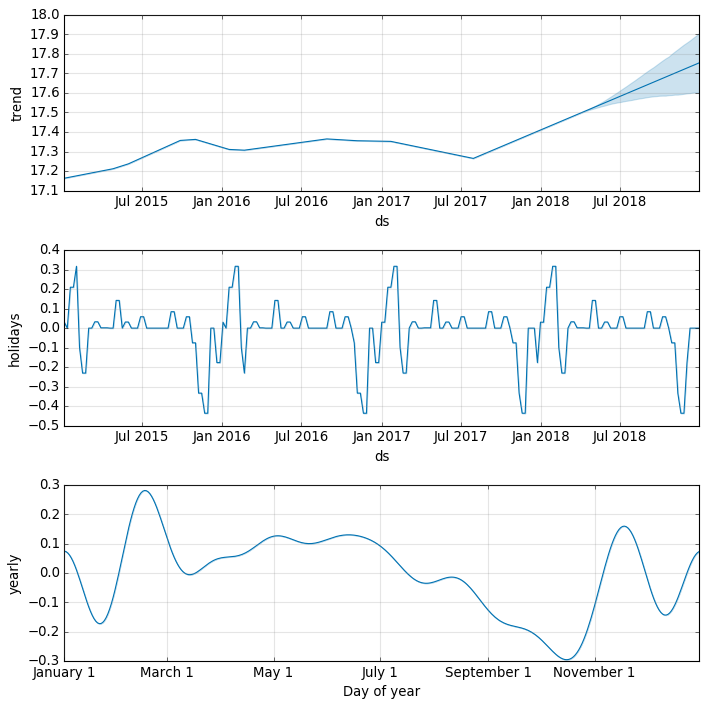

In [109]:
cv_model.plot_components(cv_forecast_log)
plt.show()

The trend clearly goes up in 2018!

Let's plot the results.

In [110]:
cv_forecast = cv_forecast_log.copy()
cv_forecast.yhat_lower = np.exp(cv_forecast_log.yhat_lower)
cv_forecast.yhat_upper = np.exp(cv_forecast_log.yhat_upper)
cv_forecast.yhat = np.exp(cv_forecast_log.yhat)

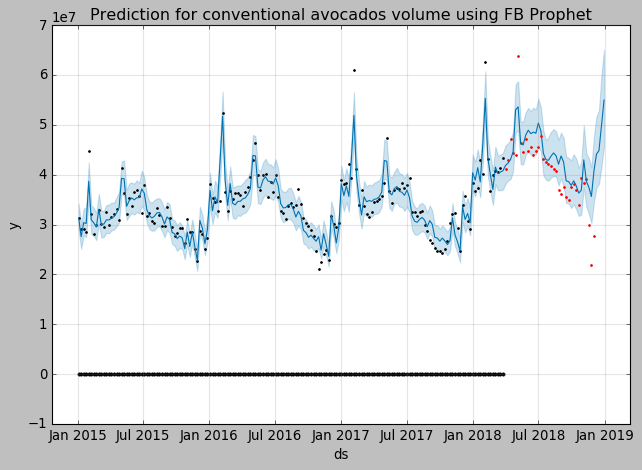

In [111]:
fig,ax = plt.subplots()
cv_model.plot(cv_forecast,ax=ax)
ax.scatter(df_test.index,df_test.con_volume,color='red',s=2)
ax.scatter(df_train.index,df_train.con_volume,color='black',s=2)
plt.title('Prediction for conventional avocados volume using FB Prophet')
plt.show()

It seems that now the model slightly over estimates.

In [112]:
score = score.append(compute_score(cv_forecast['yhat'][:205].values,df['con_volume'].values,'cut off March overall score'))
score = score.append(compute_score(cv_forecast['yhat'][:169].values,df['con_volume'][:169].values,'cut off March training score'))
score = score.append(compute_score(cv_forecast['yhat'][169:205].values,df['con_volume'][169:].values,'cut off March test score'))
score

MAE  MAPE(%)        R2
overall score                 3.33836e+06  8.96383   0.47739
training score                 1.8399e+06  5.71208  0.795903
test score                    8.23958e+06  19.5998 -0.787764
log transform overall score   2.54717e+06  6.94874  0.722405
log transform training score  1.63459e+06  4.96443  0.839811
log transform test score      5.53205e+06  13.4391  0.164596
holiday prior overall score   2.48101e+06  6.80373   0.74149
holiday prior training score   1.6502e+06  5.01521  0.837426
holiday prior test score      5.19843e+06  12.6537  0.251581
AR overall score              4.20479e+06  10.9873  0.149696
AR training score               2.751e+06  7.98258  0.459339
AR test score                 8.95991e+06  20.8153   -1.4487
cut off March overall score   2.13856e+06  6.23084  0.799252
cut off March training score  1.82788e+06   5.4222  0.841601
cut off March test score      3.59704e+06   10.027  0.462865

The scores are much better for the test data.

We have a mean absolute percentage error of 10% with an horizon of up to 36 weeks.

I will now use simulated historical forecast and the cross validation tools of FB Prophet to calculate the average scores for different horizons.

In [113]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

Now, I use the whole dataset, because I will use simulated historical forecast to calculate scores.

In [114]:
cv_train = df[['con_volume']]
cv_train.reset_index(inplace=True)
cv_train.columns=['ds','y']

In [115]:
cv_train_log = cv_train.copy()
cv_train_log.y = np.log(cv_train.y)
cv_train_log.tail()

ds          y
200 2018-11-04  17.462611
201 2018-11-11  17.480156
202 2018-11-18  17.212403
203 2018-11-25  16.899963
204 2018-12-02  17.135224

In [116]:
cv_model = Prophet(holidays=holi_prior,weekly_seasonality=False, daily_seasonality=False)

In [117]:
cv_model.fit(cv_train_log)

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [120]:
cv_cross_val = cross_validation(cv_model, initial='728 days', period='28 days', horizon='364 days')

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-01-01 00:00:00 and 2017-12-03 00:00:00
/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


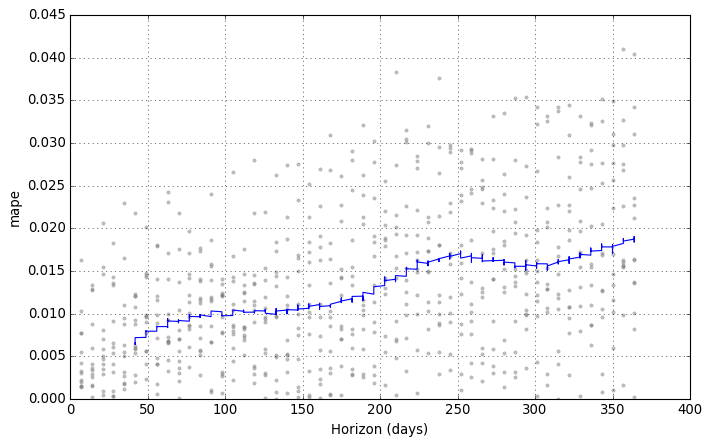

In [121]:
plot_cross_validation_metric(cv_cross_val, metric='mape')
plt.show()

The predictions Mean Absolute Percentage error remains under and around 10% up to 22 weeks.
The Mean Absolute Percentage Error is less than 20% with a 52 weeks horizon.

### To conclude:

This study showed that the avocados sales have over performed in 2018, compared to previous years. Congratulations to all avocado professionals!

The model gives good results with an horizon up to 22 weeks. It can be further fine tuned to get better results.

It can certainly help avocados salers, wholesalers and importers to forecast their activity.